In [353]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
import matplotlib.ticker as mtick
import matplotlib.ticker as ticker
import warnings
warnings.filterwarnings('ignore')
from matplotlib.offsetbox import TextArea, VPacker, AnnotationBbox
from urllib.request import urlopen
from PIL import Image
import urllib
from mplsoccer import add_image
from highlight_text import fig_text
import matplotlib.gridspec as gridspec
import math

In [322]:
df = pd.read_csv('bjk_xg.csv')

In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   38 non-null     object 
 1   bjk_goal               38 non-null     int64  
 2   bjk_xG                 38 non-null     float64
 3   opp_goal               38 non-null     int64  
 4   opp_xG                 38 non-null     float64
 5   bjk_possession         38 non-null     float64
 6   bjk_touches_att_pen    38 non-null     int64  
 7   bjk_completed_pass     38 non-null     int64  
 8   bjk_pass_accuracy      38 non-null     float64
 9   bjk_pass_attempt       38 non-null     int64  
 10  bjk_long_ball          38 non-null     int64  
 11  bjk_long_ball_acc      38 non-null     float64
 12  bjk_long_ball_attempt  38 non-null     int64  
 13  bjk_foul               38 non-null     int64  
 14  bjk_shot               38 non-null     int64  
dtypes: float

In [324]:
df['Date'] = pd.to_datetime(df['Date'])

In [325]:
df['bjk_xG_cumulative'] = df['bjk_xG'].cumsum()
df['bjk_goal_cumulative'] = df['bjk_goal'].cumsum()
df['opp_xG_cumulative'] = df['opp_xG'].cumsum()
df['opp_goal_cumulative'] = df['opp_goal'].cumsum()

### Besiktas xG flow chart

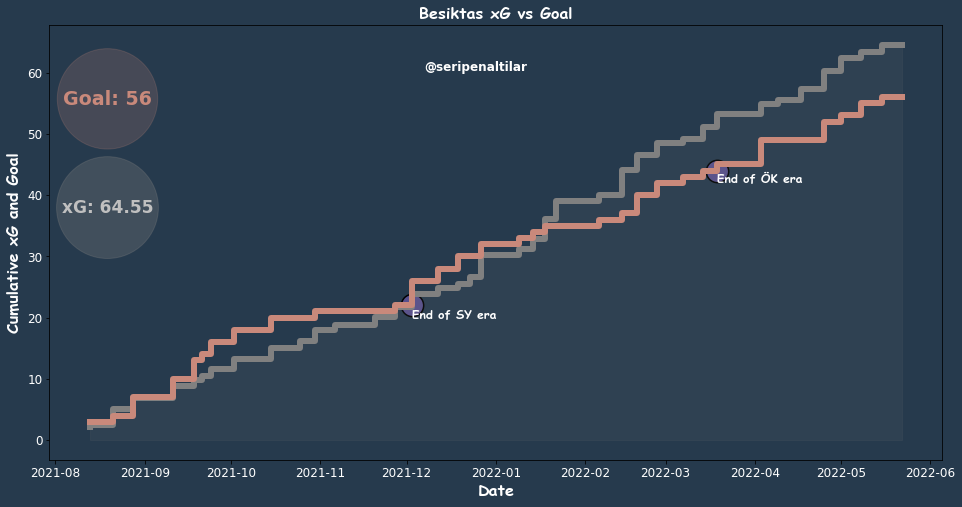

In [326]:
fig,ax = plt.subplots(figsize=(16,8))

ax.step(x=df['Date'],y=df['bjk_xG_cumulative'],c="#808080",linewidth=6)
ax.step(x=df['Date'],y=df['bjk_goal_cumulative'],c="#c9897b",linewidth=6)


ax.scatter(x=df[df['Date']=='2021-12-03']['Date'],y=df[df['Date']=='2021-12-03']['bjk_goal_cumulative'], color='#58508d', edgecolor='black',s=500,linewidths=1.5)
ax.annotate('End of SY era',(df[df['Date']=='2021-12-03']['Date'],df[df['Date']=='2021-12-03']['bjk_goal_cumulative']-2),
           color='white',weight='bold',family='Comic Sans MS',size=12)

ax.scatter(x=df[df['Date']=='2022-03-19']['Date'],y=df[df['Date']=='2022-03-19']['bjk_goal_cumulative'], color='#58508d', edgecolor='black',s=500,linewidths=1.5)

ax.annotate('End of ÖK era',(df[df['Date']=='2022-03-19']['Date'],df[df['Date']=='2022-03-19']['bjk_goal_cumulative']-2),
           color='white',weight='bold',family='Comic Sans MS',size=12)

ax.set_facecolor(color='#263a4d')
fig.patch.set_facecolor('#263a4d')

plt.fill_between(df['Date'],df['bjk_xG_cumulative'],alpha=0.1,color="#808080",step='pre')
# in fill_between y should be adjusted depending on which one is more xG or Goal

plt.text(0.065, 0.83, "Goal: {}".format(df['bjk_goal_cumulative'].max()), size=19,
         ha="center", va="center",transform=ax.transAxes,
         color="#c9897b",fontweight='bold',
         bbox=dict(boxstyle="circle",color='#c9897b',alpha=0.20)
         )

plt.text(0.065, 0.58, "xG: {}".format(round(df['bjk_xG_cumulative'].max(),2)), size=17,
         ha="center", va="center",transform=ax.transAxes,
         color="#C0C0C0",fontweight='bold',
         bbox=dict(boxstyle="circle",color='#808080',alpha=0.30)
         )

font = {'family': 'Comic Sans MS',
       'color': 'white',
       'weight': 'bold',
       'size': 16
       }

plt.xlabel('Date',fontdict=font)
plt.ylabel('Cumulative xG and Goal', fontdict=font)
plt.xticks(fontsize=12,c='white')
plt.yticks(fontsize=12,c='white')
plt.title('Besiktas xG vs Goal',fontdict=font)
plt.grid(False)
plt.figtext(0.45,0.8,'@seripenaltilar',color='white',fontweight="bold",fontsize=12)

plt.show()

### Opponents of BJK xG flow chart

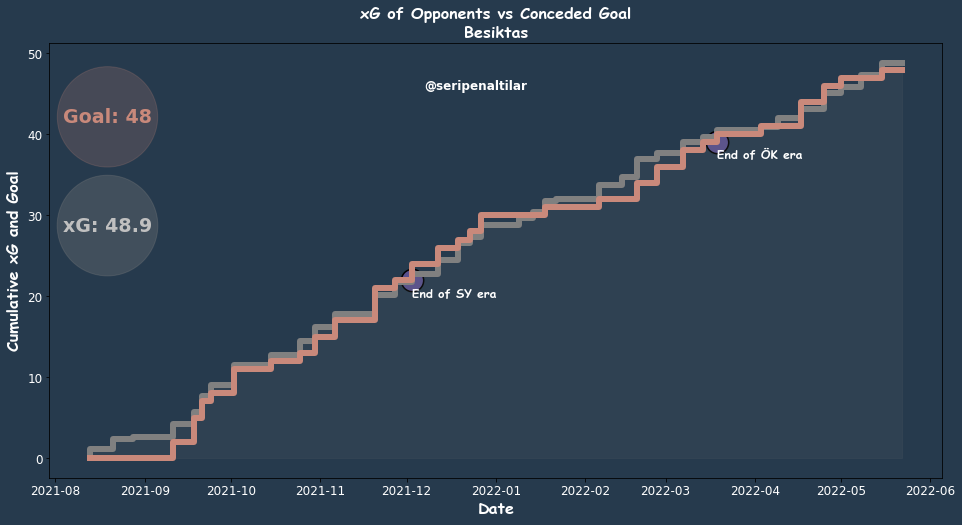

In [327]:
fig,ax = plt.subplots(figsize=(16,8))

ax.step(x=df['Date'],y=df['opp_xG_cumulative'],c="#808080",linewidth=6)
ax.step(x=df['Date'],y=df['opp_goal_cumulative'],c="#c9897b",linewidth=6)

ax.scatter(x=df[df['Date']=='2021-12-03']['Date'],y=df[df['Date']=='2021-12-03']['opp_goal_cumulative'], color='#58508d', edgecolor='black',s=500,linewidths=1.5)
ax.annotate('End of SY era',(df[df['Date']=='2021-12-03']['Date'],df[df['Date']=='2021-12-03']['opp_goal_cumulative']-2),
           color='white',weight='bold',family='Comic Sans MS',size=12)

ax.scatter(x=df[df['Date']=='2022-03-19']['Date'],y=df[df['Date']=='2022-03-19']['opp_goal_cumulative'], color='#58508d', edgecolor='black',s=500,linewidths=1.5)

ax.annotate('End of ÖK era',(df[df['Date']=='2022-03-19']['Date'],df[df['Date']=='2022-03-19']['opp_goal_cumulative']-2),
           color='white',weight='bold',family='Comic Sans MS',size=12)

ax.set_facecolor(color='#263a4d')
fig.patch.set_facecolor('#263a4d')

plt.fill_between(df['Date'],df['opp_xG_cumulative'],alpha=0.1,color="#808080",step='pre')
# in fill_between y should be adjusted depending on which one is more xG or Goal

plt.text(0.065, 0.83, "Goal: {}".format(df['opp_goal_cumulative'].max()), size=19,
         ha="center", va="center",transform=ax.transAxes,
         color="#c9897b",fontweight='bold',
         bbox=dict(boxstyle="circle",color='#c9897b',alpha=0.20)
         )

plt.text(0.065, 0.58, "xG: {}".format(round(df['opp_xG_cumulative'].max(),1)), size=19,
         ha="center", va="center",transform=ax.transAxes,
         color="#C0C0C0",fontweight='bold',
         bbox=dict(boxstyle="circle",color='#808080',alpha=0.30)
         )

font = {'family': 'Comic Sans MS',
       'color': 'white',
       'weight': 'bold',
       'size': 16
       }

plt.xlabel('Date',fontdict=font)
plt.ylabel('Cumulative xG and Goal', fontdict=font)
plt.xticks(fontsize=12,c='white')
plt.yticks(fontsize=12,c='white')
plt.title('xG of Opponents vs Conceded Goal\nBesiktas',fontdict=font)
plt.grid(False)
plt.figtext(0.45,0.8,'@seripenaltilar',color='white',fontweight="bold",fontsize=12)

plt.show()

### Rolling Mean xG for & Against

In [328]:
# adding rolling mean and converting first 4 matches cumulative average
df['bjk_xG_roll_mean'] = df['bjk_xG'].rolling(window=5,min_periods=1).mean()
df['opp_xG_roll_mean'] = df['opp_xG'].rolling(window=5,min_periods=1).mean()

In [329]:
# creating new df and renaming columns
roll = df[['Date','bjk_xG_roll_mean','opp_xG_roll_mean']]
roll.rename(columns={'bjk_xG_roll_mean':'bjk','opp_xG_roll_mean':'opp'},inplace=True)

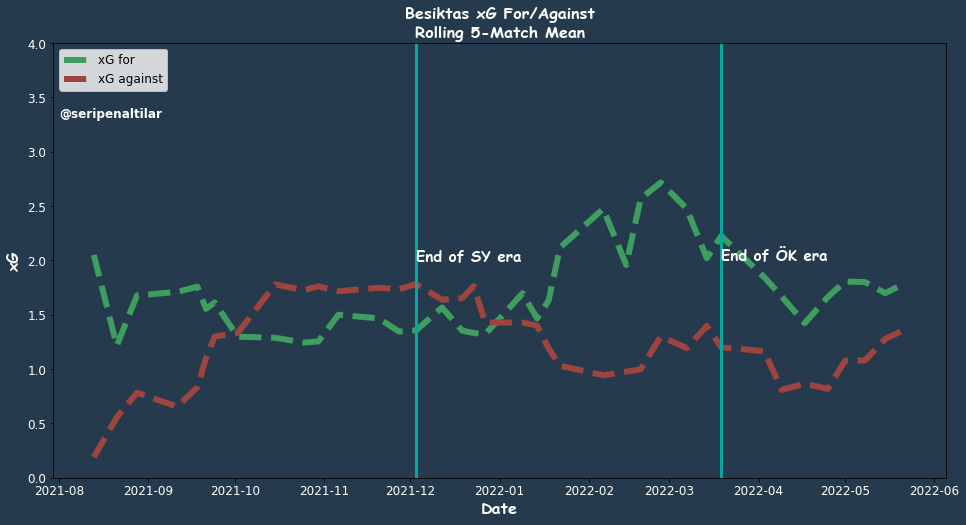

In [330]:
# rolling mean line plot

fig,ax = plt.subplots(figsize=(16,8))

fig.patch.set_facecolor('#263a4d')
ax.set_facecolor(color='#263a4d')

plt.plot(roll['Date'],roll['bjk'],ls='dashed',lw=6,c='#3e9e5f',label='xG for')
plt.plot(roll['Date'],roll['opp'],ls='dashed',lw=6,c='#9e443e',label='xG against')

#adding vertical line for annotation
plt.axvline(x=roll[roll['Date']=='2021-12-03']['Date'], ymin=0, ymax=4,lw=3,c='#03a89e')
plt.annotate('End of SY era',(roll[roll['Date']=='2021-12-03']['Date'],2),
           color='white',weight='bold',family='Comic Sans MS',size=15)

plt.axvline(x=roll[roll['Date']=='2022-03-19']['Date'], ymin=0, ymax=4,lw=3,c='#03a89e')
plt.annotate('End of ÖK era',(roll[roll['Date']=='2022-03-19']['Date'],2),
           color='white',weight='bold',family='Comic Sans MS',size=15)

plt.ylim(0,4)

font = {'family': 'Comic Sans MS',
       'color': 'white',
       'weight': 'bold',
       'size': 16
       }

plt.xlabel('Date',fontdict=font)
plt.ylabel('xG', fontdict=font)
plt.xticks(fontsize=12,c='white')
plt.yticks(fontsize=12,c='white')
plt.figtext(0.13,0.75,'@seripenaltilar',color='white',fontweight="bold",fontsize=12)
plt.legend(loc=2,prop={'size': 12})
plt.title('Besiktas xG For/Against\nRolling 5-Match Mean',fontdict=font)
plt.show()

### Focusing on xG Difference

In [331]:
df['xG_difference'] = df['bjk_xG'] - df['opp_xG']

In [332]:
# 6:win, 4:draw, 2:loose

df['result'] = np.where(df['bjk_goal']-df['opp_goal']>0,6,
                np.where(df['bjk_goal']-df['opp_goal']==0,4,2
                        ))

In [333]:
# Manager

df['manager'] = np.where(df['Date']<='2021-12-03','SY',np.where(df['Date']<='2022-03-19','ÖK','VI'))

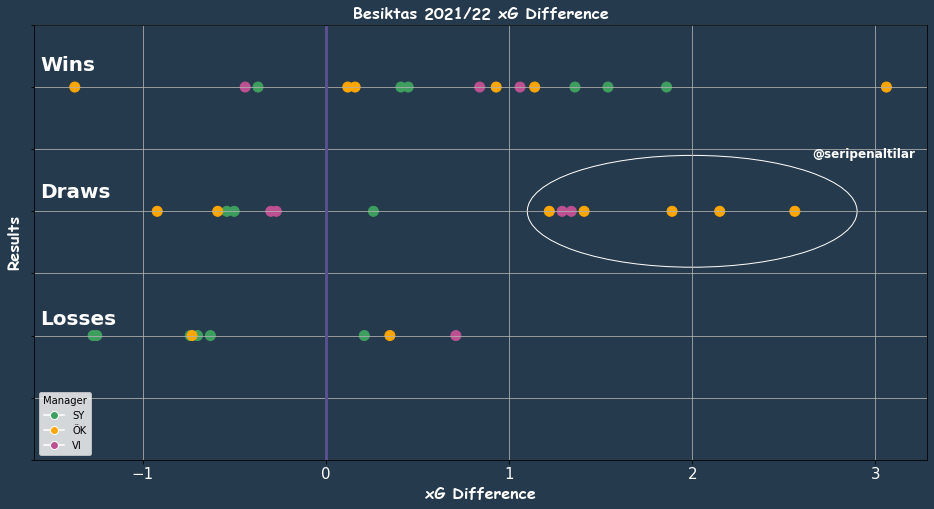

In [334]:
fig, ax = plt.subplots(figsize=(16,8))

fig.patch.set_facecolor('#263a4d')
ax.set_facecolor(color='#263a4d')

colors = {'SY':'#3e9e5f','ÖK':'#ffa600','VI':'#bc5090'}
ax.scatter(df['xG_difference'],df['result'],s=100,c=df['manager'].map(colors))
plt.yticks([x for x in range(0,8,1)])

plt.axvline(x=0, ymin=0, ymax=8,lw=3,c='#58508d')


font = {'family': 'Comic Sans MS',
       'color': 'white',
       'weight': 'bold',
       'size': 16
       }

plt.xlabel('xG Difference',fontdict=font)
plt.ylabel('Results', fontdict=font)
plt.xticks(fontsize=15,c='white')

plt.figtext(0.80,0.65,'@seripenaltilar',color='white',fontweight="bold",fontsize=12)
plt.figtext(0.13,0.80,'Wins',color='white',fontweight="bold",fontsize=20)
plt.figtext(0.13,0.58,'Draws',color='white',fontweight="bold",fontsize=20)
plt.figtext(0.13,0.36,'Losses',color='white',fontweight="bold",fontsize=20)

circle = plt.Circle((2, 4), 0.9,color='w',fill=False)
ax.add_patch(circle)

plt.title('Besiktas 2021/22 xG Difference',fontdict=font)
ax.grid(True) # adding grid
ax.set_yticklabels([]) #removing y tick labels

# creting legens
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in colors.items()]
ax.legend(title='Manager', handles=handles, loc='lower left')


plt.show()

### Rolling Mean Possession & Pass Accuracy

In [335]:
df['poss_roll'] = df['bjk_possession'].rolling(window=5,min_periods=1).mean()
df['accuracy_roll'] = df['bjk_pass_accuracy'].rolling(window=5,min_periods=1).mean()

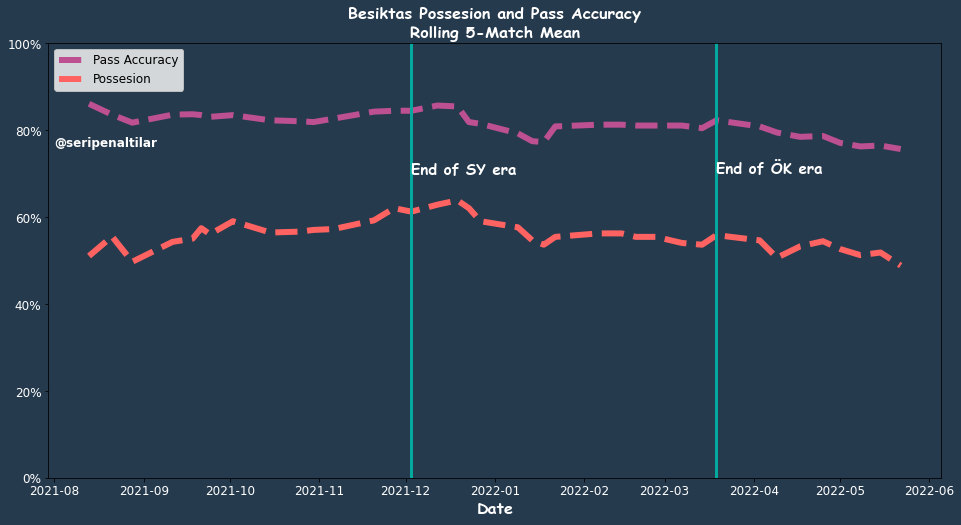

In [336]:
fig, ax = plt.subplots(figsize=(16,8))

fig.patch.set_facecolor('#263a4d')
ax.set_facecolor(color='#263a4d')

plt.plot(df['Date'],df['accuracy_roll'],ls='dashed',lw=6,c='#bc5090',label='Pass Accuracy')
plt.plot(df['Date'],df['poss_roll'],ls='dashed',lw=6,c='#ff6361',label='Possesion')

plt.axvline(x=df[df['Date']=='2021-12-03']['Date'], ymin=0, ymax=1,lw=3,c='#03a89e')
plt.annotate('End of SY era',(df[df['Date']=='2021-12-03']['Date'],0.7),
           color='white',weight='bold',family='Comic Sans MS',size=15)

plt.axvline(x=df[df['Date']=='2022-03-19']['Date'], ymin=0, ymax=1,lw=3,c='#03a89e')
plt.annotate('End of ÖK era',(df[df['Date']=='2022-03-19']['Date'],0.7),
           color='white',weight='bold',family='Comic Sans MS',size=15)

font = {'family': 'Comic Sans MS',
       'color': 'white',
       'weight': 'bold',
       'size': 16}

plt.xlabel('Date',fontdict=font)
plt.xticks(fontsize=12,c='white')
plt.yticks(fontsize=12,c='white')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.ylim(0,1)
plt.legend(loc=2,prop={'size':12})
plt.figtext(0.13,0.70,'@seripenaltilar',color='white',fontweight="bold",fontsize=12)
plt.title('Besiktas Possesion and Pass Accuracy\nRolling 5-Match Mean',fontdict=font)
plt.show()

### Scatter Plot Touches Attack Pen Area vs Possesion

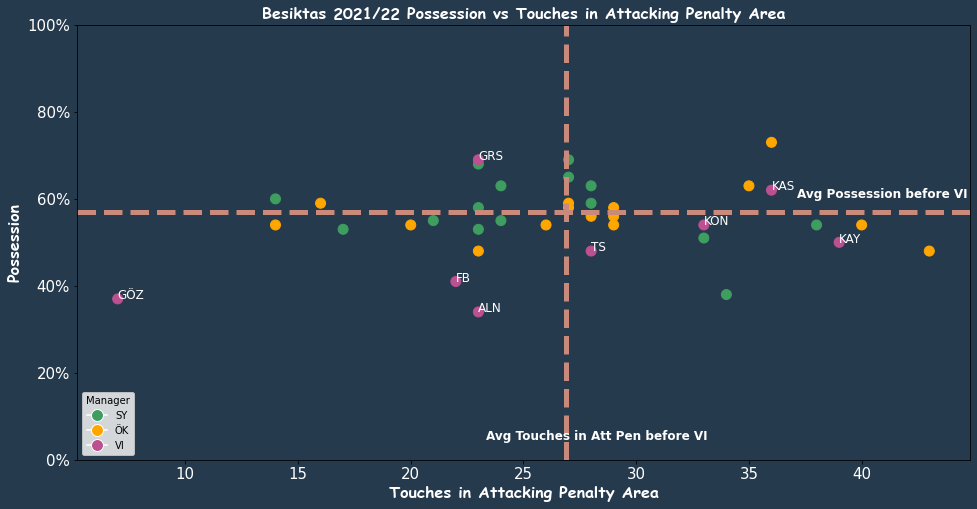

In [338]:
fig, ax = plt.subplots(figsize=(16,8))

fig.patch.set_facecolor('#263a4d')
ax.set_facecolor(color='#263a4d')

colors = {'SY':'#3e9e5f','ÖK':'#ffa600','VI':'#bc5090'}
ax.scatter(df['bjk_touches_att_pen'],df['bjk_possession'],s=100,c=df['manager'].map(colors))

plt.ylim(0,1)

font = {'family': 'Comic Sans MS',
       'color': 'white',
       'weight': 'bold',
       'size': 16
       }

plt.axvline(x=df[df['manager']!='VI']['bjk_touches_att_pen'].mean(), ymin=0, ymax=1,lw=5,ls='--',c='#c9897b')
plt.axhline(y=df[df['manager']!='VI']['bjk_possession'].mean(), xmin=0, xmax=60,lw=5,ls='--',c='#c9897b')


plt.xlabel('Touches in Attacking Penalty Area',fontdict=font)
plt.ylabel('Possession', fontdict=font)
plt.xticks(fontsize=15,c='white')
plt.yticks(fontsize=15,c='white')

plt.text(df[df['Date']=='2022-04-09']['bjk_touches_att_pen'],df[df['Date']=='2022-04-09']['bjk_possession'],"ALN", color='white',size=12)
plt.text(df[df['Date']=='2022-04-03']['bjk_touches_att_pen'],df[df['Date']=='2022-04-03']['bjk_possession'],"TS", color='white',size=12)
plt.text(df[df['Date']=='2022-05-01']['bjk_touches_att_pen'],df[df['Date']=='2022-05-01']['bjk_possession'],"KAY", color='white',size=12)
plt.text(df[df['Date']=='2022-04-17']['bjk_touches_att_pen'],df[df['Date']=='2022-04-17']['bjk_possession'],"GRS", color='white',size=12)
plt.text(df[df['Date']=='2022-04-25']['bjk_touches_att_pen'],df[df['Date']=='2022-04-25']['bjk_possession'],"KAS", color='white',size=12)
plt.text(df[df['Date']=='2022-05-08']['bjk_touches_att_pen'],df[df['Date']=='2022-05-08']['bjk_possession'],"FB", color='white',size=12)
plt.text(df[df['Date']=='2022-05-15']['bjk_touches_att_pen'],df[df['Date']=='2022-05-15']['bjk_possession'],"GÖZ", color='white',size=12)
plt.text(df[df['Date']=='2022-05-22']['bjk_touches_att_pen'],df[df['Date']=='2022-05-22']['bjk_possession'],"KON", color='white',size=12)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))


# creting legends
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=12) for k, v in colors.items()]
ax.legend(title='Manager', handles=handles, loc='lower left')
#plt.figtext(0.80,0.80,'@seripenaltilar',color='white',fontweight="bold",fontsize=12)
plt.figtext(0.75,0.58,'Avg Possession before VI',color='white',fontweight="bold",fontsize=12)
plt.figtext(0.48,0.16,'Avg Touches in Att Pen before VI',color='white',fontweight="bold",fontsize=12)
plt.title('Besiktas 2021/22 Possession vs Touches in Attacking Penalty Area',fontdict=font)
plt.show()

### Correlation Heat Map

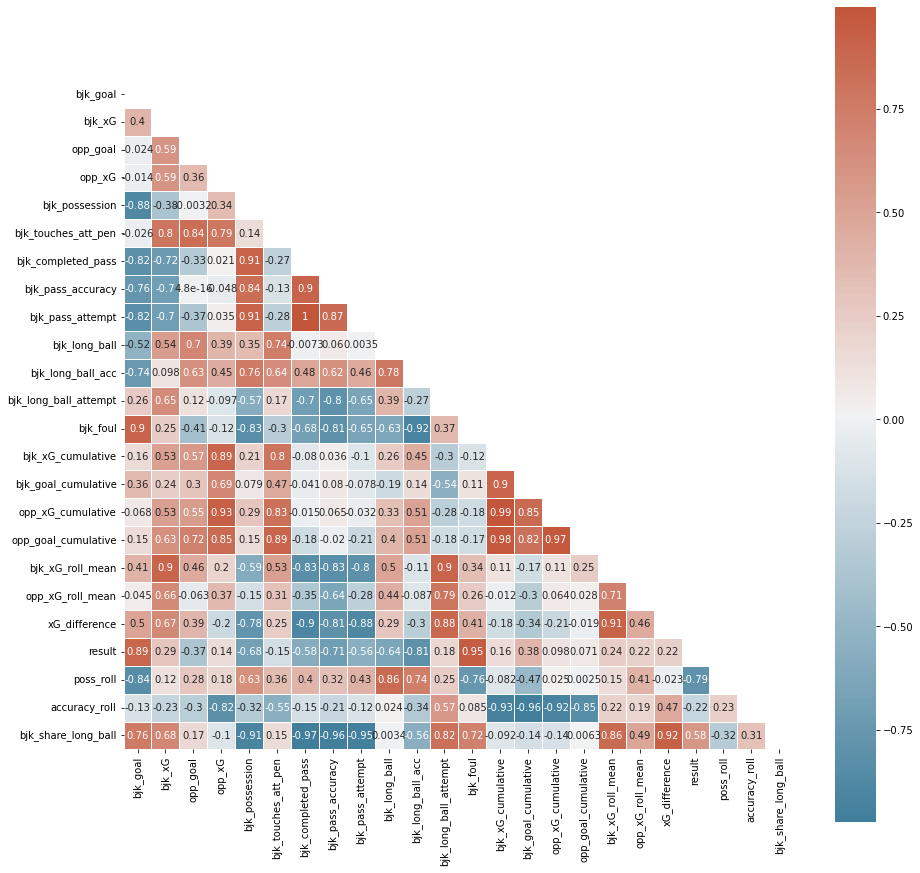

In [115]:
# heatmap to check correlated columns
corr = df[df['manager']=='VI'].corr()
f, ax = plt.subplots(figsize=(15, 15))
mask = np.triu(np.ones_like(corr, dtype=bool)) # removing the other side of the heatmap
cmap = sns.diverging_palette(230, 20, as_cmap=True) #preparing cmap
sns.heatmap(corr,mask=mask,cmap=cmap,linewidths=.5,square=True,annot=True)
plt.show()

### Long Passes among completed passses vs Fouls

In [339]:
df['bjk_share_long_ball'] = df['bjk_long_ball_attempt']/df['bjk_pass_attempt']

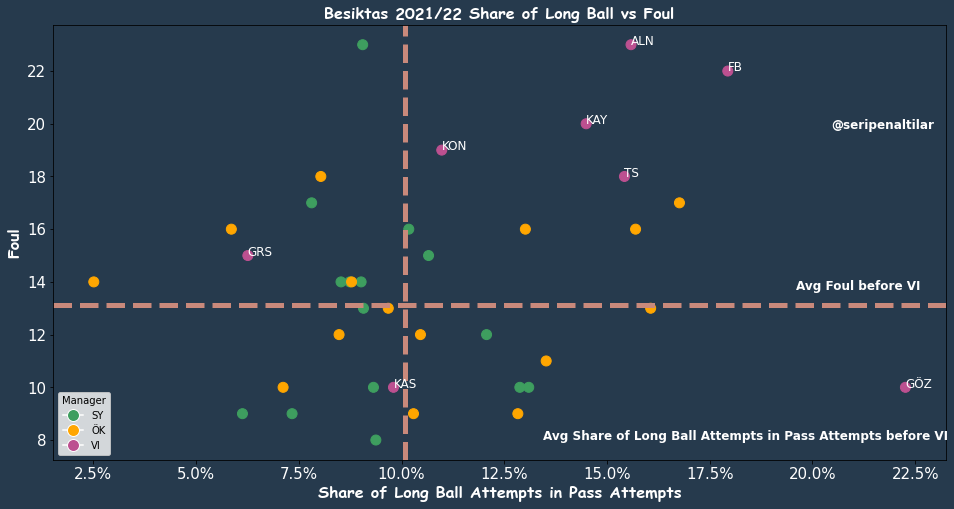

In [341]:
fig, ax = plt.subplots(figsize=(16,8))

fig.patch.set_facecolor('#263a4d')
ax.set_facecolor(color='#263a4d')

colors = {'SY':'#3e9e5f','ÖK':'#ffa600','VI':'#bc5090'}
ax.scatter(df['bjk_share_long_ball'],df['bjk_foul'],s=100,c=df['manager'].map(colors))

#plt.ylim(0,1)

font = {'family': 'Comic Sans MS',
       'color': 'white',
       'weight': 'bold',
       'size': 16
       }

plt.axvline(x=df[df['manager']!='VI']['bjk_share_long_ball'].mean(), ymin=0, ymax=1,lw=5,ls='--',c='#c9897b')
plt.axhline(y=df[df['manager']!='VI']['bjk_foul'].mean(), xmin=0, xmax=60,lw=5,ls='--',c='#c9897b')


plt.xlabel('Share of Long Ball Attempts in Pass Attempts',fontdict=font)
plt.ylabel('Foul', fontdict=font)
plt.xticks(fontsize=15,c='white')
plt.yticks(fontsize=15,c='white')

plt.text(df[df['Date']=='2022-04-09']['bjk_share_long_ball'],df[df['Date']=='2022-04-09']['bjk_foul'],"ALN", color='white',size=12)
plt.text(df[df['Date']=='2022-04-03']['bjk_share_long_ball'],df[df['Date']=='2022-04-03']['bjk_foul'],"TS", color='white',size=12)
plt.text(df[df['Date']=='2022-05-01']['bjk_share_long_ball'],df[df['Date']=='2022-05-01']['bjk_foul'],"KAY", color='white',size=12)
plt.text(df[df['Date']=='2022-04-17']['bjk_share_long_ball'],df[df['Date']=='2022-04-17']['bjk_foul'],"GRS", color='white',size=12)
plt.text(df[df['Date']=='2022-04-25']['bjk_share_long_ball'],df[df['Date']=='2022-04-25']['bjk_foul'],"KAS", color='white',size=12)
plt.text(df[df['Date']=='2022-05-08']['bjk_share_long_ball'],df[df['Date']=='2022-05-08']['bjk_foul'],"FB", color='white',size=12)
plt.text(df[df['Date']=='2022-05-15']['bjk_share_long_ball'],df[df['Date']=='2022-05-15']['bjk_foul'],"GÖZ", color='white',size=12)
plt.text(df[df['Date']=='2022-05-22']['bjk_share_long_ball'],df[df['Date']=='2022-05-22']['bjk_foul'],"KON", color='white',size=12)

ax.xaxis.set_major_formatter(mtick.PercentFormatter(1))


# creting legends
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=12) for k, v in colors.items()]
ax.legend(title='Manager', handles=handles, loc='lower left')
plt.figtext(0.80,0.70,'@seripenaltilar',color='white',fontweight="bold",fontsize=12)
plt.figtext(0.77,0.42,'Avg Foul before VI',color='white',fontweight="bold",fontsize=12)
plt.figtext(0.55,0.16,'Avg Share of Long Ball Attempts in Pass Attempts before VI',color='white',fontweight="bold",fontsize=12)
plt.title('Besiktas 2021/22 Share of Long Ball vs Foul',fontdict=font)
plt.show()

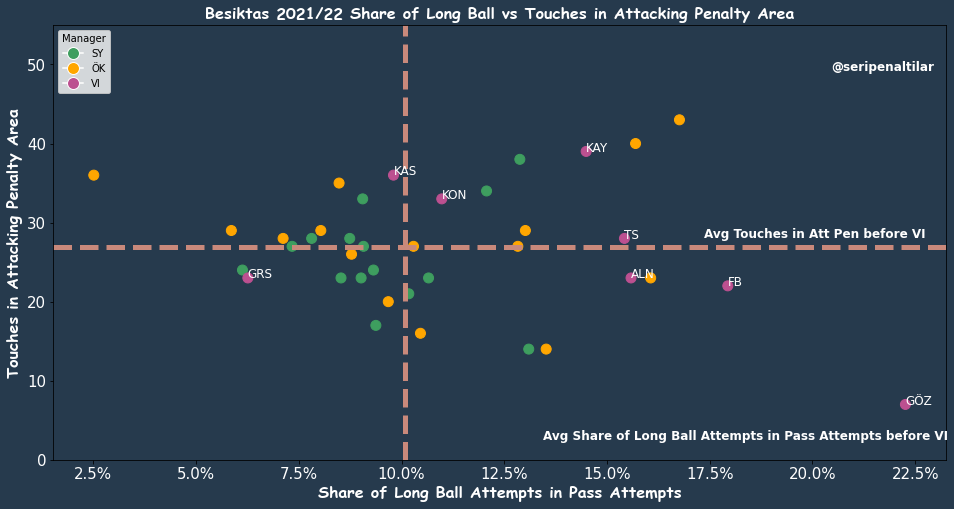

In [342]:
fig, ax = plt.subplots(figsize=(16,8))

fig.patch.set_facecolor('#263a4d')
ax.set_facecolor(color='#263a4d')

colors = {'SY':'#3e9e5f','ÖK':'#ffa600','VI':'#bc5090'}
ax.scatter(df['bjk_share_long_ball'],df['bjk_touches_att_pen'],s=100,c=df['manager'].map(colors))

plt.ylim(0,55)

font = {'family': 'Comic Sans MS',
       'color': 'white',
       'weight': 'bold',
       'size': 16
       }

plt.axvline(x=df[df['manager']!='VI']['bjk_share_long_ball'].mean(), ymin=0, ymax=1,lw=5,ls='--',c='#c9897b')
plt.axhline(y=df[df['manager']!='VI']['bjk_touches_att_pen'].mean(), xmin=0, xmax=60,lw=5,ls='--',c='#c9897b')


plt.xlabel('Share of Long Ball Attempts in Pass Attempts',fontdict=font)
plt.ylabel('Touches in Attacking Penalty Area', fontdict=font)
plt.xticks(fontsize=15,c='white')
plt.yticks(fontsize=15,c='white')

plt.text(df[df['Date']=='2022-04-09']['bjk_share_long_ball'],df[df['Date']=='2022-04-09']['bjk_touches_att_pen'],"ALN", color='white',size=12)
plt.text(df[df['Date']=='2022-04-03']['bjk_share_long_ball'],df[df['Date']=='2022-04-03']['bjk_touches_att_pen'],"TS", color='white',size=12)
plt.text(df[df['Date']=='2022-05-01']['bjk_share_long_ball'],df[df['Date']=='2022-05-01']['bjk_touches_att_pen'],"KAY", color='white',size=12)
plt.text(df[df['Date']=='2022-04-17']['bjk_share_long_ball'],df[df['Date']=='2022-04-17']['bjk_touches_att_pen'],"GRS", color='white',size=12)
plt.text(df[df['Date']=='2022-04-25']['bjk_share_long_ball'],df[df['Date']=='2022-04-25']['bjk_touches_att_pen'],"KAS", color='white',size=12)
plt.text(df[df['Date']=='2022-05-08']['bjk_share_long_ball'],df[df['Date']=='2022-05-08']['bjk_touches_att_pen'],"FB", color='white',size=12)
plt.text(df[df['Date']=='2022-05-15']['bjk_share_long_ball'],df[df['Date']=='2022-05-15']['bjk_touches_att_pen'],"GÖZ", color='white',size=12)
plt.text(df[df['Date']=='2022-05-22']['bjk_share_long_ball'],df[df['Date']=='2022-05-22']['bjk_touches_att_pen'],"KON", color='white',size=12)

ax.xaxis.set_major_formatter(mtick.PercentFormatter(1))


# creting legends
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=12) for k, v in colors.items()]
ax.legend(title='Manager', handles=handles, loc='upper left')
plt.figtext(0.80,0.80,'@seripenaltilar',color='white',fontweight="bold",fontsize=12)
plt.figtext(0.69,0.51,'Avg Touches in Att Pen before VI',color='white',fontweight="bold",fontsize=12)
plt.figtext(0.55,0.16,'Avg Share of Long Ball Attempts in Pass Attempts before VI',color='white',fontweight="bold",fontsize=12)
plt.title('Besiktas 2021/22 Share of Long Ball vs Touches in Attacking Penalty Area',fontdict=font)
plt.show()

### Long Ball Attempts and Pass Attempts

In [343]:
df['pass_roll'] = df['bjk_pass_attempt'].rolling(window=5,min_periods=1).mean()
df['long_roll'] = df['bjk_long_ball_attempt'].rolling(window=5,min_periods=1).mean()

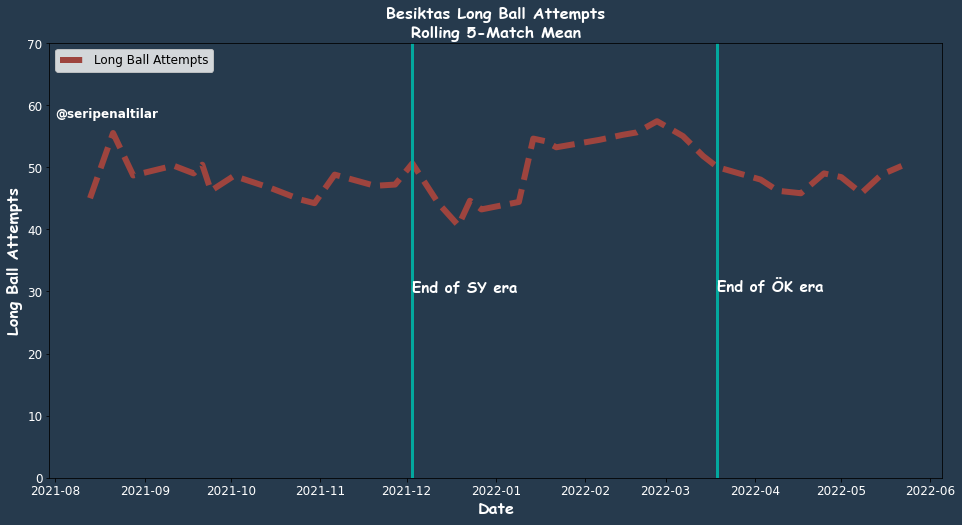

In [344]:
# rolling mean line plot

fig,ax = plt.subplots(figsize=(16,8))

fig.patch.set_facecolor('#263a4d')
ax.set_facecolor(color='#263a4d')

#plt.plot(df['Date'],df['pass_roll'],ls='dashed',lw=6,c='#3e9e5f',label='Passes')
plt.plot(df['Date'],df['long_roll'],ls='dashed',lw=6,c='#9e443e',label='Long Ball Attempts')

#adding vertical line for annotation
plt.axvline(x=df[df['Date']=='2021-12-03']['Date'], ymin=0, ymax=4,lw=3,c='#03a89e')
plt.annotate('End of SY era',(df[df['Date']=='2021-12-03']['Date'],30),
           color='white',weight='bold',family='Comic Sans MS',size=15)

plt.axvline(x=df[df['Date']=='2022-03-19']['Date'], ymin=0, ymax=4,lw=3,c='#03a89e')
plt.annotate('End of ÖK era',(df[df['Date']=='2022-03-19']['Date'],30),
           color='white',weight='bold',family='Comic Sans MS',size=15)

plt.ylim(0,70)

font = {'family': 'Comic Sans MS',
       'color': 'white',
       'weight': 'bold',
       'size': 16
       }

plt.xlabel('Date',fontdict=font)
plt.ylabel('Long Ball Attempts', fontdict=font)
plt.xticks(fontsize=12,c='white')
plt.yticks(fontsize=12,c='white')
plt.figtext(0.13,0.75,'@seripenaltilar',color='white',fontweight="bold",fontsize=12)
plt.legend(loc=2,prop={'size': 12})
plt.title('Besiktas Long Ball Attempts\nRolling 5-Match Mean',fontdict=font)
plt.show()

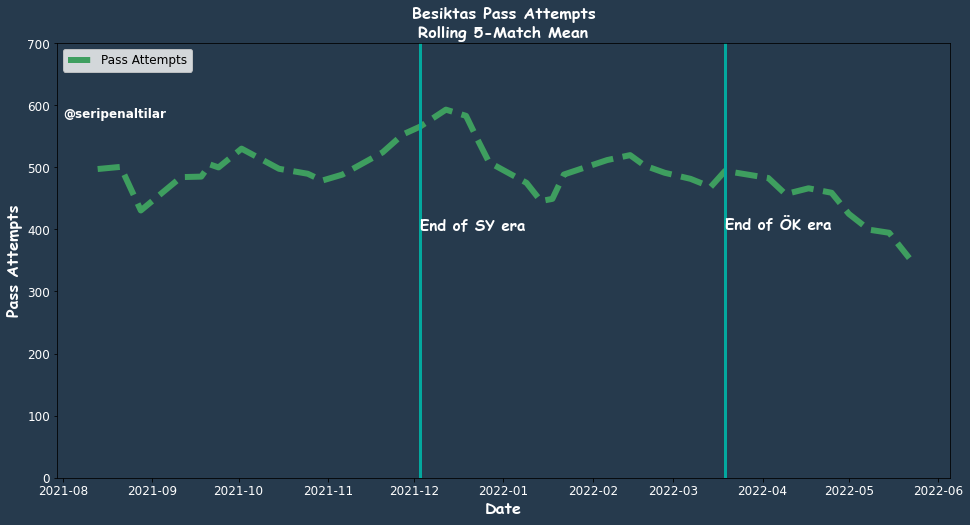

In [345]:
# rolling mean line plot

fig,ax = plt.subplots(figsize=(16,8))

fig.patch.set_facecolor('#263a4d')
ax.set_facecolor(color='#263a4d')

plt.plot(df['Date'],df['pass_roll'],ls='dashed',lw=6,c='#3e9e5f',label='Pass Attempts')
#plt.plot(df['Date'],df['long_roll'],ls='dashed',lw=6,c='#9e443e',label='Long Ball Attempts')

#adding vertical line for annotation
plt.axvline(x=df[df['Date']=='2021-12-03']['Date'], ymin=0, ymax=4,lw=3,c='#03a89e')
plt.annotate('End of SY era',(df[df['Date']=='2021-12-03']['Date'],400),
           color='white',weight='bold',family='Comic Sans MS',size=15)

plt.axvline(x=df[df['Date']=='2022-03-19']['Date'], ymin=0, ymax=4,lw=3,c='#03a89e')
plt.annotate('End of ÖK era',(df[df['Date']=='2022-03-19']['Date'],400),
           color='white',weight='bold',family='Comic Sans MS',size=15)

plt.ylim(0,700)

font = {'family': 'Comic Sans MS',
       'color': 'white',
       'weight': 'bold',
       'size': 16
       }

plt.xlabel('Date',fontdict=font)
plt.ylabel('Pass Attempts', fontdict=font)
plt.xticks(fontsize=12,c='white')
plt.yticks(fontsize=12,c='white')
plt.figtext(0.13,0.75,'@seripenaltilar',color='white',fontweight="bold",fontsize=12)
plt.legend(loc=2,prop={'size': 12})
plt.title('Besiktas Pass Attempts\nRolling 5-Match Mean',fontdict=font)
plt.show()

### xG Per Shot

In [354]:
df['xG_per_shot'] = df['bjk_xG']/df['bjk_shot']

In [366]:
df['final'] = np.where(df['bjk_goal']-df['opp_goal']>0,'W',
                np.where(df['bjk_goal']-df['opp_goal']==0,'D','L'
                        ))

In [368]:
df['conversion'] = df['bjk_goal']/df['bjk_shot']

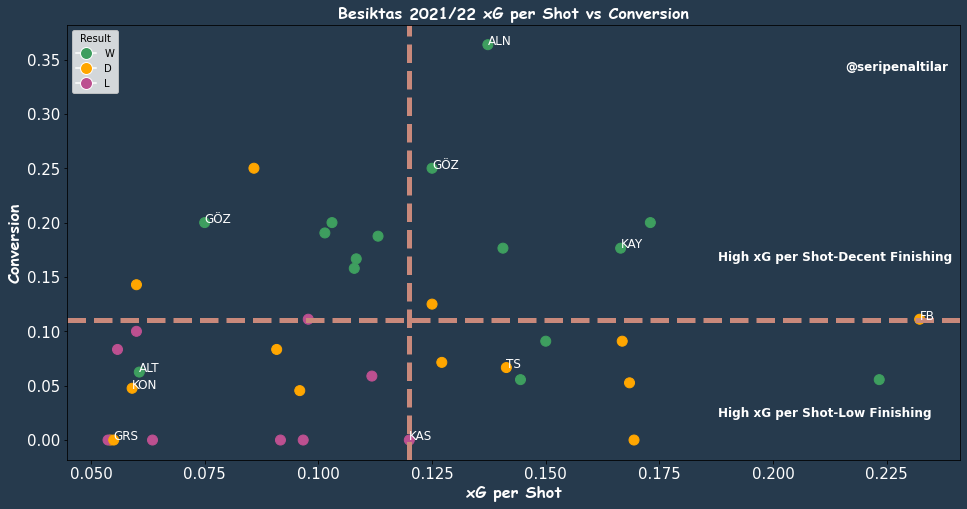

In [396]:
fig, ax = plt.subplots(figsize=(16,8))

fig.patch.set_facecolor('#263a4d')
ax.set_facecolor(color='#263a4d')

colors = {'W':'#3e9e5f','D':'#ffa600','L':'#bc5090'}
ax.scatter(df['xG_per_shot'],df['conversion'],s=100,c=df['final'].map(colors))


font = {'family': 'Comic Sans MS',
       'color': 'white',
       'weight': 'bold',
       'size': 16
       }

plt.axvline(x=0.12, ymin=0, ymax=1,lw=5,ls='--',c='#c9897b')
plt.axhline(y=0.11, xmin=0, xmax=60,lw=5,ls='--',c='#c9897b')


plt.xlabel('xG per Shot',fontdict=font)
plt.ylabel('Conversion', fontdict=font)
plt.xticks(fontsize=15,c='white')
plt.yticks(fontsize=15,c='white')

plt.text(df[df['Date']=='2022-04-09']['xG_per_shot'],df[df['Date']=='2022-04-09']['conversion'],"ALN", color='white',size=12)
plt.text(df[df['Date']=='2022-04-03']['xG_per_shot'],df[df['Date']=='2022-04-03']['conversion'],"TS", color='white',size=12)
plt.text(df[df['Date']=='2022-05-01']['xG_per_shot'],df[df['Date']=='2022-05-01']['conversion'],"KAY", color='white',size=12)
plt.text(df[df['Date']=='2022-04-17']['xG_per_shot'],df[df['Date']=='2022-04-17']['conversion'],"GRS", color='white',size=12)
plt.text(df[df['Date']=='2022-04-25']['xG_per_shot'],df[df['Date']=='2022-04-25']['conversion'],"KAS", color='white',size=12)
plt.text(df[df['Date']=='2022-05-08']['xG_per_shot'],df[df['Date']=='2022-05-08']['conversion'],"FB", color='white',size=12)
plt.text(df[df['Date']=='2022-05-15']['xG_per_shot'],df[df['Date']=='2022-05-15']['conversion'],"GÖZ", color='white',size=12)
plt.text(df[df['Date']=='2022-05-22']['xG_per_shot'],df[df['Date']=='2022-05-22']['conversion'],"KON", color='white',size=12)
plt.text(df[df['Date']=='2022-01-14']['xG_per_shot'],df[df['Date']=='2022-01-14']['conversion'],"ALT", color='white',size=12)
plt.text(df[df['Date']=='2021-12-23']['xG_per_shot'],df[df['Date']=='2021-12-23']['conversion'],"GÖZ", color='white',size=12)



# creting legends
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=12) for k, v in colors.items()]
ax.legend(title='Result', handles=handles, loc='upper left')
plt.figtext(0.80,0.80,'@seripenaltilar',color='white',fontweight="bold",fontsize=12)
plt.figtext(0.69,0.47,'High xG per Shot-Decent Finishing',color='white',fontweight="bold",fontsize=12)
plt.figtext(0.69,0.20,'High xG per Shot-Low Finishing',color='white',fontweight="bold",fontsize=12)
plt.title('Besiktas 2021/22 xG per Shot vs Conversion',fontdict=font)
plt.show()

### Conversion vs xG per Shot

In [397]:
df2 = pd.read_csv('rowz.csv')

In [420]:
xg = df2.iloc[:,:10]

In [422]:
xg['bjk_result'] = np.where(xg['bjk_goal']-xg['bjk_opp_goal']>0,'W',
                np.where(xg['bjk_goal']-xg['bjk_opp_goal']==0,'D','L'
                        ))

In [424]:
xg['ts_result'] = np.where(xg['ts_goal']-xg['ts_opp_goal']>0,'W',
                np.where(xg['ts_goal']-xg['ts_opp_goal']==0,'D','L'
                        ))

In [427]:
xg['ts_xG_per_shot'] = xg['ts_xG'] / xg['ts_shot']
xg['ts_conversion'] =  xg['ts_goal'] / xg['ts_shot']

In [428]:
xg.head()

,matchday,bjk_xG,bjk_goal,bjk_shot,bjk_opp_xG,bjk_opp_goal,ts_xG,ts_goal,ts_shot,ts_opp_goal,bjk_result,ts_result,ts_xG_per_shot,ts_conversion
0,1,2.5,3,19,0.2,0,3.9,5,14,1,W,W,0.278571,0.357143
1,2,0.5,0,7,1.0,0,2.0,2,14,1,D,W,0.142857,0.142857
2,3,2.8,1,18,1.0,0,1.6,1,13,0,W,W,0.123077,0.076923
3,4,1.6,3,16,0.2,0,1.9,2,19,2,W,D,0.100000,0.105263
4,5,1.8,3,19,1.3,2,0.8,1,12,0,W,W,0.066667,0.083333


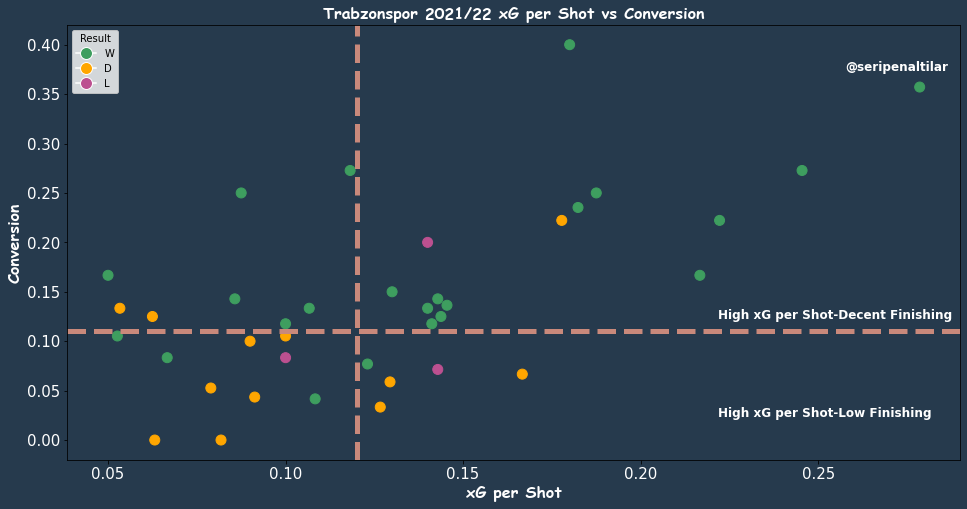

In [434]:
fig, ax = plt.subplots(figsize=(16,8))

fig.patch.set_facecolor('#263a4d')
ax.set_facecolor(color='#263a4d')

colors = {'W':'#3e9e5f','D':'#ffa600','L':'#bc5090'}
ax.scatter(xg['ts_xG_per_shot'],xg['ts_conversion'],s=100,c=xg['ts_result'].map(colors))


font = {'family': 'Comic Sans MS',
       'color': 'white',
       'weight': 'bold',
       'size': 16
       }

plt.axvline(x=0.12, ymin=0, ymax=1,lw=5,ls='--',c='#c9897b')
plt.axhline(y=0.11, xmin=0, xmax=60,lw=5,ls='--',c='#c9897b')


plt.xlabel('xG per Shot',fontdict=font)
plt.ylabel('Conversion', fontdict=font)
plt.xticks(fontsize=15,c='white')
plt.yticks(fontsize=15,c='white')

#plt.text(df[df['Date']=='2022-04-09']['xG_per_shot'],df[df['Date']=='2022-04-09']['conversion'],"ALN", color='white',size=12)
#plt.text(df[df['Date']=='2022-04-03']['xG_per_shot'],df[df['Date']=='2022-04-03']['conversion'],"TS", color='white',size=12)
#plt.text(df[df['Date']=='2022-05-01']['xG_per_shot'],df[df['Date']=='2022-05-01']['conversion'],"KAY", color='white',size=12)
#plt.text(df[df['Date']=='2022-04-17']['xG_per_shot'],df[df['Date']=='2022-04-17']['conversion'],"GRS", color='white',size=12)
#plt.text(df[df['Date']=='2022-04-25']['xG_per_shot'],df[df['Date']=='2022-04-25']['conversion'],"KAS", color='white',size=12)
#plt.text(df[df['Date']=='2022-05-08']['xG_per_shot'],df[df['Date']=='2022-05-08']['conversion'],"FB", color='white',size=12)
#plt.text(df[df['Date']=='2022-05-15']['xG_per_shot'],df[df['Date']=='2022-05-15']['conversion'],"GÖZ", color='white',size=12)
#plt.text(df[df['Date']=='2022-05-22']['xG_per_shot'],df[df['Date']=='2022-05-22']['conversion'],"KON", color='white',size=12)
#plt.text(df[df['Date']=='2022-01-14']['xG_per_shot'],df[df['Date']=='2022-01-14']['conversion'],"ALT", color='white',size=12)
#plt.text(df[df['Date']=='2021-12-23']['xG_per_shot'],df[df['Date']=='2021-12-23']['conversion'],"GÖZ", color='white',size=12)



# creting legends
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=12) for k, v in colors.items()]
ax.legend(title='Result', handles=handles, loc='upper left')
plt.figtext(0.80,0.80,'@seripenaltilar',color='white',fontweight="bold",fontsize=12)
plt.figtext(0.69,0.37,'High xG per Shot-Decent Finishing',color='white',fontweight="bold",fontsize=12)
plt.figtext(0.69,0.20,'High xG per Shot-Low Finishing',color='white',fontweight="bold",fontsize=12)
plt.title('Trabzonspor 2021/22 xG per Shot vs Conversion',fontdict=font)
plt.show()

### Conversion

In [6]:
df = pd.read_csv('shots.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Team           19 non-null     object
 1   Shots Against  19 non-null     int64 
 2   Shots For      19 non-null     int64 
 3   Goals For      19 non-null     int64 
 4   Goals Against  19 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 888.0+ bytes


In [67]:
df['Conversion Against'] = (df['Goals Against'] / df['Shots Against'])*100
df['Conversion For'] = (df['Goals For'] / df['Shots For'])*100

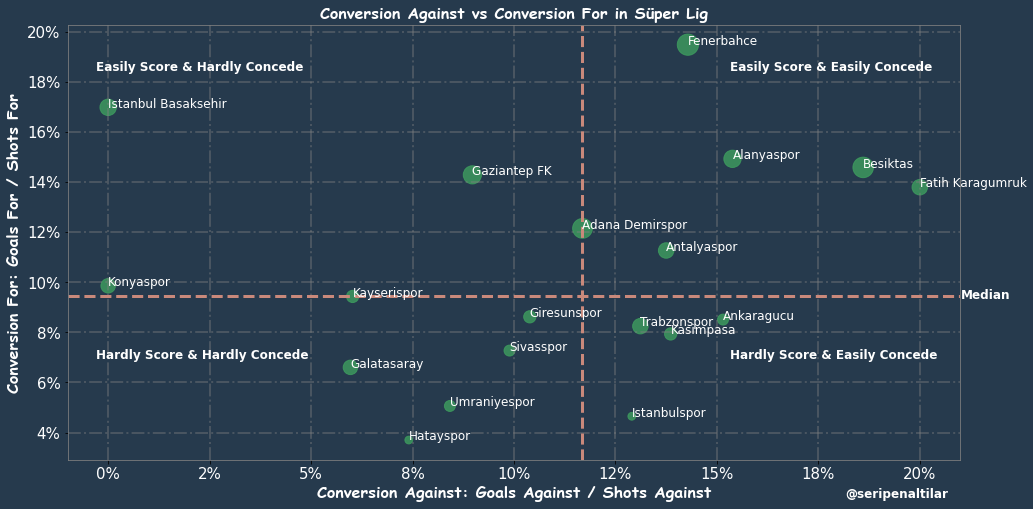

In [68]:
# creating scatter
fig,ax = plt.subplots(figsize=(16,8))
fig.patch.set_facecolor('#263a4d')

ax.scatter(df['Conversion Against'],df['Conversion For'],alpha=0.8,c='#3e9e5f',s=df['Goals For']*30)

ax.set_facecolor(color='#263a4d')
ax.spines[['left','bottom','right','top']].set_color('grey')

ax.grid(b = True, color ='grey',
            linestyle ='-.', linewidth = 2,
            alpha = 0.4)

font = {'family': 'Comic Sans MS',
       'color': 'white',
       'weight': 'bold',
       'size': 16
       }

plt.axvline(x=df['Conversion Against'].median(), ymin=0, ymax=1,lw=3,ls='--',c='#c9897b')
plt.axhline(y=df['Conversion For'].median(), xmin=0, xmax=60,lw=3,ls='--',c='#c9897b')

for x in df['Team']:
    ax.annotate(x,(df[df['Team']==x]['Conversion Against'],
                   df[df['Team']==x]['Conversion For']),c='white',size=12)


ax.set_xlabel('Conversion Against: Goals Against / Shots Against', fontdict=font)
ax.set_ylabel('Conversion For: Goals For / Shots For', fontdict=font)
plt.xticks(fontsize=15,c='white')
plt.yticks(fontsize=15,c='white')

ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
ax.xaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

plt.title("Conversion Against vs Conversion For in Süper Lig",fontdict=font)

plt.figtext(0.80,0.06,"@seripenaltilar",fontsize=12,fontweight='bold',color='white')
plt.figtext(0.90,0.405,"Median",fontsize=12,fontweight='bold',color='white')

plt.figtext(0.15,0.80,"Easily Score & Hardly Concede",fontsize=12,fontweight='bold',color='white')
plt.figtext(0.15,0.30,"Hardly Score & Hardly Concede",fontsize=12,fontweight='bold',color='white')
plt.figtext(0.70,0.30,"Hardly Score & Easily Concede",fontsize=12,fontweight='bold',color='white')
plt.figtext(0.70,0.80,"Easily Score & Easily Concede",fontsize=12,fontweight='bold',color='white')

plt.show()

### Stacked Bar chart

In [379]:
df = pd.read_csv('pass.csv')

In [396]:
df = df.sort_values(by='Total').reset_index(drop=True)

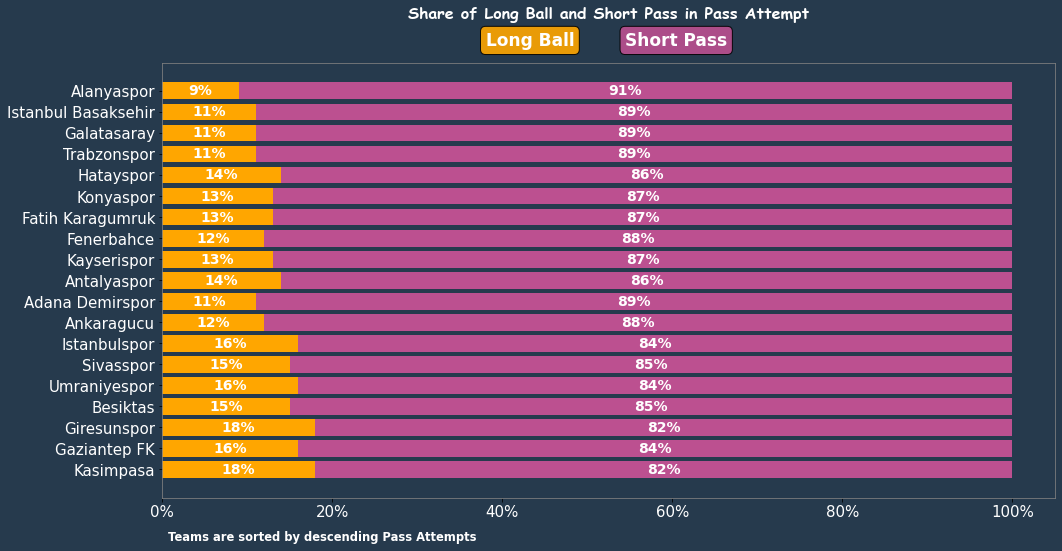

In [599]:
fig, ax = plt.subplots(figsize=(16,8))

fig.patch.set_facecolor('#263a4d')
ax.set_facecolor(color='#263a4d')
ax.spines[['left','bottom','right','top']].set_color('grey')
plt.barh(df['Team'],df['LB Share'],color='#ffa600')
plt.barh(df['Team'],df['SP Share'],left=df['LB Share'],color='#bc5090')

font = {'family': 'Comic Sans MS',
       'color': 'white',
       'weight': 'bold',
       'size': 16
       }
plt.title("Share of Long Ball and Short Pass in Pass Attempt",fontdict=font,pad=44)

#plt.legend(["Long Ball", "Short Pass"], title="Pass Type",loc=[-0.12,-0.1])

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width > 0:
         ax.annotate("{:.0%}".format(width), xy=(left+width/2, bottom+height/2), ha='center', va='center',color='white',
                    size=14,weight='bold')
            
plt.xticks(fontsize=15,c='white')
plt.yticks(fontsize=15,c='white')
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.annotate('Long Ball', xy=(0.52,20.4),
             xytext=(-30, 0), textcoords='offset points',
             size=17, ha='right', va="center",c='white',annotation_clip=False,weight='bold',
             bbox=dict(boxstyle="round", alpha=0.9,facecolor='#ffa600'))

plt.annotate('Short Pass', xy=(0.70,20.4),
             xytext=(-30, 0), textcoords='offset points',
             size=17, ha='right', va="center",c='white',annotation_clip=False,weight='bold',
             bbox=dict(boxstyle="round", alpha=0.9,facecolor='#bc5090'))

plt.figtext(0.13,0.05,"Teams are sorted by descending Pass Attempts",fontsize=11.5,fontweight='bold',color='white')

plt.show()

### STSL

In [3]:
df = pd.read_csv('stsl.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Team       19 non-null     object 
 1   xG_open    19 non-null     float64
 2   goal_open  19 non-null     int64  
 3   xG_set     19 non-null     float64
 4   goal_set   19 non-null     int64  
 5   build_up   19 non-null     int64  
 6   direct     19 non-null     int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 1.2+ KB


In [26]:
df1 = df[df['Team'].isin(['Gaziantep FK','Ümraniyespor','Giresunspor','Istanbulspor'])]
df2 = df[df['Team'].isin(['Adana Demirspor', 'Fenerbahce','Galatasaray','Ankaragücü','Alanyaspor','Hatayspor'])]
df3 = df[df['Team'].isin(['Kasimpasa', 'Sivasspor','Konyaspor','Kayserispor','Antalyaspor'])]
df4 = df[df['Team'].isin(['Trabzonspor','Fatih Karagümrük','Besiktas','Istanbul Basaksehir'])]

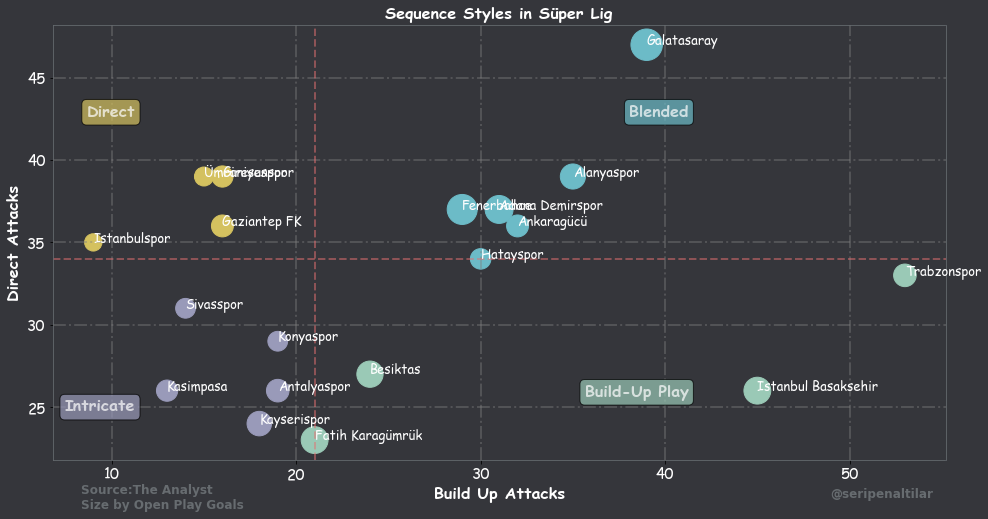

In [32]:
# creating scatter
fig,ax = plt.subplots(figsize=(16,8))
fig.patch.set_facecolor('#35363b')

ax.scatter(df1['build_up'],df1['direct'],c='#d4c15f',s=df1['goal_open']*30)
ax.scatter(df2['build_up'],df2['direct'],c='#6cbbc7',s=df2['goal_open']*30)
ax.scatter(df3['build_up'],df3['direct'],c='#999ab9',s=df3['goal_open']*30)
ax.scatter(df4['build_up'],df4['direct'],c='#9ac9b6',s=df4['goal_open']*30)

ax.set_facecolor(color='#35363b')
ax.spines[['left','bottom','right','top']].set_color('#676c70')
ax.grid(b = True, color ='grey',
            linestyle ='-.', linewidth = 2,
            alpha = 0.4)

font = {'family': 'Comic Sans MS',
       'color': 'white',
       'weight': 'bold',
       'size': 16
       }

plt.axvline(x=df['build_up'].median(), ymin=0, ymax=1,lw=2,ls='--',c='#e57072',alpha=0.5)
plt.axhline(y=df['direct'].median(), xmin=0, xmax=60,lw=2,ls='--',c='#e57072',alpha=0.5)

for x in df['Team']:
    ax.annotate(x,(df[df['Team']==x]['build_up'],
                   df[df['Team']==x]['direct']),c='white',size=13,family='Comic Sans MS')


ax.set_xlabel('Build Up Attacks', fontdict=font)
ax.set_ylabel('Direct Attacks', fontdict=font)
plt.xticks(fontsize=15,c='white',family='Comic Sans MS')
plt.yticks(fontsize=15,c='white',family='Comic Sans MS')

plt.annotate('Direct', xy=(12.9,42.9),
             xytext=(-30, 0), textcoords='offset points',
             size=16, ha='right', va="center",c='white',annotation_clip=False,weight='bold',family='Comic Sans MS',
             alpha=0.7,
             bbox=dict(boxstyle="round", alpha=0.7,facecolor='#d4c15f'))

plt.annotate('Intricate', xy=(12.9,25),
             xytext=(-30, 0), textcoords='offset points',
             size=16, ha='right', va="center",c='white',annotation_clip=False,weight='bold',family='Comic Sans MS',
             alpha=0.7,
             bbox=dict(boxstyle="round", alpha=0.7,facecolor='#999ab9'))

plt.annotate('Build-Up Play', xy=(42.9,25.9),
             xytext=(-30, 0), textcoords='offset points',
             size=16, ha='right', va="center",c='white',annotation_clip=False,weight='bold',family='Comic Sans MS',
             alpha=0.7,
             bbox=dict(boxstyle="round", alpha=0.7,facecolor='#9ac9b6'))

plt.annotate('Blended', xy=(42.9,42.9),
             xytext=(-30, 0), textcoords='offset points',
             size=16, ha='right', va="center",c='white',annotation_clip=False,weight='bold',family='Comic Sans MS',
             alpha=0.7,
             bbox=dict(boxstyle="round", alpha=0.7,facecolor='#6cbbc7'))

plt.title("Sequence Styles in Süper Lig",fontdict=font)
plt.figtext(0.80,0.06,"@seripenaltilar",fontsize=12,fontweight='bold',color='#676c70')
plt.figtext(0.15,0.04,"Source:The Analyst\nSize by Open Play Goals",fontsize=12,fontweight='bold',color='#676c70')
#plt.figtext(0.90,0.405,"Median",fontsize=12,fontweight='bold',color='white')


plt.show()

In [7]:
df['set_xg'] = df['xG_set']/(df['xG_open'] + df['xG_set'])*100
df['set_goal'] = df['goal_set']/(df['goal_open'] + df['goal_set'])*100

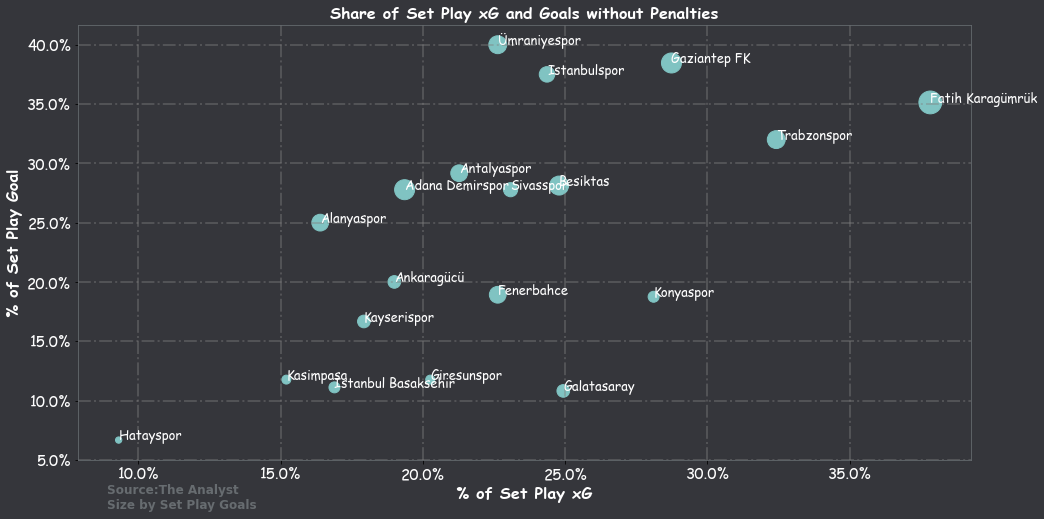

In [29]:
# creating scatter
fig,ax = plt.subplots(figsize=(16,8))
fig.patch.set_facecolor('#35363b')

ax.scatter(df['set_xg'],df['set_goal'],c='#80c3c2',s=df['goal_set']*40)


ax.set_facecolor(color='#35363b')
ax.spines[['left','bottom','right','top']].set_color('#676c70')
ax.grid(b = True, color ='grey',
            linestyle ='-.', linewidth = 2,
            alpha = 0.4)

font = {'family': 'Comic Sans MS',
       'color': 'white',
       'weight': 'bold',
       'size': 16
       }

for x in df['Team']:
    ax.annotate(x,(df[df['Team']==x]['set_xg'],
                   df[df['Team']==x]['set_goal']),c='white',size=13,family='Comic Sans MS')


ax.set_xlabel('% of Set Play xG', fontdict=font)
ax.set_ylabel('% of Set Play Goal', fontdict=font)
plt.xticks(fontsize=15,c='white',family='Comic Sans MS')
plt.yticks(fontsize=15,c='white',family='Comic Sans MS')


plt.title("Share of Set Play xG and Goals without Penalties",fontdict=font)
#plt.figtext(0.80,0.06,"@seripenaltilar",fontsize=12,fontweight='bold',color='#676c70')
plt.figtext(0.15,0.04,"Source:The Analyst\nSize by Set Play Goals",fontsize=12,fontweight='bold',color='#676c70')

ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.yaxis.set_major_formatter(mtick.PercentFormatter())


plt.show()

In [67]:
df = pd.read_csv('bjk_0202.csv')   

In [63]:
def solve(s):
    for x in s.split():
        s = s.replace(x, x.capitalize())
    return s

In [68]:
df['Player'] = df['Player'].apply(solve)

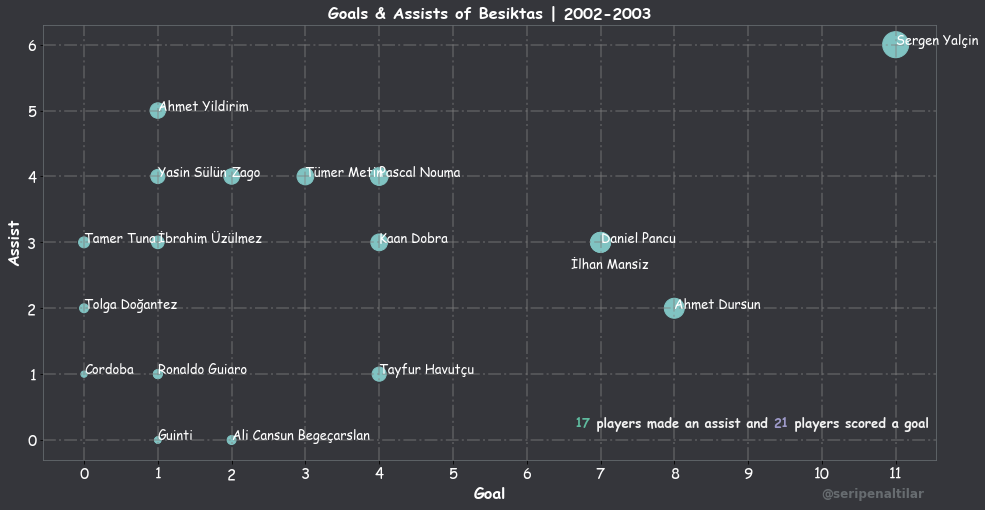

In [139]:
# creating scatter
fig,ax = plt.subplots(figsize=(16,8))
fig.patch.set_facecolor('#35363b')

ax.scatter(df['Goal'],df['Assist'],c='#80c3c2',s=(df['Goal'] + df['Assist'])*40)


ax.set_facecolor(color='#35363b')
ax.spines[['left','bottom','right','top']].set_color('#676c70')
ax.grid(b = True, color ='grey',
            linestyle ='-.', linewidth = 2,
            alpha = 0.4)

font = {'family': 'Comic Sans MS',
       'color': 'white',
       'weight': 'bold',
       'size': 16
       }

players = ['Sergen Yalçin',
'Ahmet Yildirim',
'Zago',
'Pascal Nouma',
'Tümer Metin',
'Yasin Sülün',
'Daniel Pancu',
'İbrahim Üzülmez',
'Kaan Dobra',          
'Tamer Tuna',
'Ahmet Dursun',
'Tolga Doğantez',
'Ronaldo Guiaro',
'Cordoba',
'Tayfur Havutçu',
'Guinti',
'Ali Cansun Begeçarslan']

for x in players:
    ax.annotate(x,(df[df['Player']==x]['Goal'],
                   df[df['Player']==x]['Assist']),c='white',size=13,family='Comic Sans MS')

ax.annotate('İlhan Mansiz',(df[df['Player']=='İlhan Mansiz']['Goal']-0.4,
                   df[df['Player']=='İlhan Mansiz']['Assist']-0.4),c='white',size=13,family='Comic Sans MS')

ax.set_xlabel('Goal', fontdict=font)
ax.set_ylabel('Assist', fontdict=font)
plt.xticks(np.arange(0, 11+1, 1.0),fontsize=15,c='white',family='Comic Sans MS')
plt.yticks(fontsize=15,c='white',family='Comic Sans MS')



plt.title("Goals & Assists of Besiktas | 2002-2003",fontdict=font)
plt.figtext(0.80,0.06,"@seripenaltilar",fontsize=12,fontweight='bold',color='#676c70')


fig_text(
    0.74, 0.2, "<17> players made an assist and <21> players scored a goal", size=13, fig=fig,
    highlight_textprops=[{"color": '#5fbb9f'}, {"color": '#9e9ac9'}],
    ha="center", color="#F2F2F2", fontweight='bold',family='Comic Sans MS'
)

plt.show()

In [143]:
#sb.competitions()

In [144]:
#sb.matches(competition_id=2,season_id=44)

In [11]:
df = pd.read_csv('xg.csv')

In [12]:
df

,Team,Opponent,t_goal,o_goal,Venue,xG for,xG against,MD,Season
0,Besiktas,Kayserispor,1,0,H,1.52,0.46,MD 1,22-23
1,Besiktas,Alanyaspor,3,3,A,1.32,1.80,MD 2,22-23
2,Besiktas,Karagümrük,4,1,H,2.57,0.91,MD 3,22-23
3,Besiktas,Sivasspor,3,1,H,2.05,0.72,MD 4,22-23
4,Fenerbahce,Ümraniyespor,3,3,H,2.41,1.33,MD 1,22-23
...,...,...,...,...,...,...,...,...,...
72,Galatasaray,Basaksehir,7,0,A,2.17,0.36,MD 14,22-23
73,Trabzonspor,Konyaspor,2,2,H,2.70,1.38,MD 13,22-23
74,Trabzonspor,Ankaragücü,1,1,A,0.76,1.76,MD 14,22-23
75,Konyaspor,Kasimpasa,1,1,H,1.16,1.10,MD 12,22-23


In [172]:
df = pd.read_csv('stsl_matches.csv')

In [119]:
df['team_h'][0]

'Sivasspor'

In [120]:
[df['team_h'][0],df['team_a'][0]]

['Sivasspor', 'Besiktas']

In [123]:
df.columns

Index(['team_h', 'team_a', 'date', 'week', 'goal_h', 'goal_a', 'result',
       'xg_h', 'xg_openplay_h', 'xg_setplay_h', 'xg_per_shot_h', 'shots_h',
       'shots_on_target_h', 'shots_inside_box_h', 'big_chances_h',
       'big_chances_missed_h', 'possession_h', 'passes_h', 'accuracy_passes_h',
       'passes_opposition_half_h', 'crosses_h', 'accuracy_crosses',
       'successful dribbles_h', 'tackles_won_h', 'duels_won_h', 'xg_a',
       'xg_openplay_a', 'xg_setplay_a', 'xg_per_shot_a', 'shots_a',
       'shots_on_target_a', 'shots_inside_box_a', 'big_chances_a',
       'big_chances_missed_a', 'possession_a', 'passes_a', 'accuracy_passes_a',
       'passes_opposition_half_a', 'crosses_a', 'accuracy_crosses.1',
       'successful dribbles_a', 'tackles_won_a', 'duels_won_a'],
      dtype='object')

In [183]:
df.iloc[:,7:16].values.tolist()[0]

[0.81, 0.64, 0.17, 0.09, 9.0, 2.0, 5.0, 1.0, 1.0]

In [219]:
df.iloc[:,16:25]

,possession_h,passes_h,accuracy_passes_h,passes_opposition_half_h,crosses_h,accuracy_crosses,successful dribbles_h,tackles_won_h,duels_won_h
0,0.4,302,0.64,116,13,0.31,12,20,0.53


In [221]:
df.iloc[:,34:]

,possession_a,passes_a,accuracy_passes_a,passes_opposition_half_a,crosses_a,accuracy_crosses.1,successful dribbles_a,tackles_won_a,duels_won_a
0,0.6,437,0.72,150,26,0.23,8,9,0.47


In [633]:
df = pd.read_csv('stsl_matches.csv')
df['date'] = pd.to_datetime(df['date'])

df_scatter = df[['team_h','team_a','date','week','xg_h','xg_a','result']]
df_h = df_scatter[df_scatter['team_h']=='Besiktas'].rename(columns={'xg_h':'xg_for','xg_a':'xg_against'})
df_a = df_scatter[df_scatter['team_a']=='Besiktas'].rename(columns={'xg_a':'xg_for','xg_h':'xg_against'})
df_a = df_a[['team_h','team_a','date','week','xg_for','xg_against','result']]

scatter = pd.concat([df_h,df_a])
scatter.sort_values(by='date',inplace=True)

x = scatter['xg_against']
y = scatter['xg_for']

x_win = scatter[scatter['result']=='Besiktas']['xg_against']
y_win = scatter[scatter['result']=='Besiktas']['xg_for']

x_lose = scatter[(scatter['result']!='Besiktas') & (scatter['result']!='Draw')]['xg_against']
y_lose = scatter[(scatter['result']!='Besiktas') & (scatter['result']!='Draw')]['xg_for']

x_draw = scatter[scatter['result']=='Draw']['xg_against']
y_draw = scatter[scatter['result']=='Draw']['xg_for']

df = df[(df['team_h']=='Besiktas') | (df['team_a']=='Besiktas')]
df = df.tail(1)

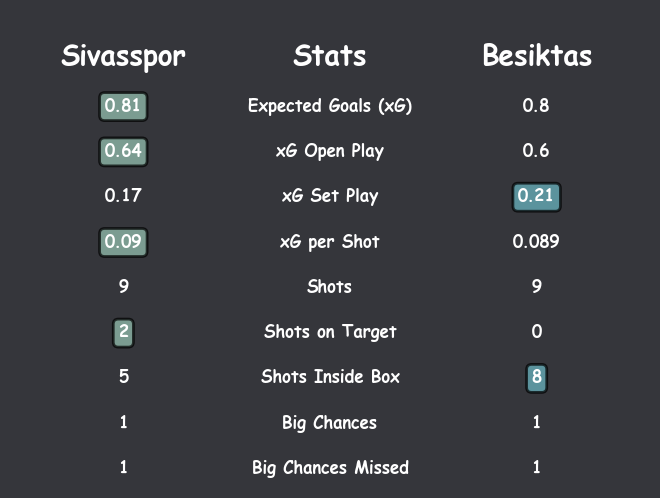

In [259]:
data = {
    'stats': ['Expected Goals (xG)', 'xG Open Play', 'xG Set Play', 'xG per Shot', 'Shots', 'Shots on Target',
             'Shots Inside Box', 'Big Chances', 'Big Chances Missed'],
    'stats_h': df.iloc[:,7:16].values.tolist()[0],
    'stats_a': df.iloc[:,25:34].values.tolist()[0]
}

fig = plt.figure(figsize=(4,3), dpi=200)
ax = plt.subplot(111)

fig.patch.set_facecolor('#35363b')
ax.set_facecolor(color='#35363b')

ncols = 3
nrows = 10

ax.set_xlim(0, ncols)
ax.set_ylim(0, nrows)
ax.set_axis_off()


for i,j in zip(np.arange(0,9,1)[::-1],range(0,9)):
    
    ax.annotate(
            xy=(1.5,i),
            text=data['stats'][j],
            ha='center',
            color='white',
            size=8,
            weight='bold',
            family='Comic Sans MS'
            )  
    
    if data['stats_h'][j]>data['stats_a'][j]:
        
            ax.annotate(
            xy=(0.5,i),
            text='{0:.3f}'.format(data['stats_h'][j]).rstrip('0').rstrip('.'),size=8,
            ha='center',bbox=dict(boxstyle="round", alpha=0.7,facecolor='#9ac9b6'),
            color='white',
            weight='bold',
            family='Comic Sans MS'
            )
    
            ax.annotate(
            xy=(2.5,i),size=8,
            text='{0:.3f}'.format(data['stats_a'][j]).rstrip('0').rstrip('.'),
            ha='center',color='white',
            weight='bold',
            family='Comic Sans MS'
            )
        
    elif data['stats_h'][j]<data['stats_a'][j]:
        
            ax.annotate(
            xy=(0.5,i),
            text='{0:.2f}'.format(data['stats_h'][j]).rstrip('0').rstrip('.'),size=8,
            ha='center',
            color='white',
            weight='bold',
            family='Comic Sans MS'
            )

            ax.annotate(
            xy=(2.5,i),
            text='{0:.3f}'.format(data['stats_a'][j]).rstrip('0').rstrip('.'),size=8,
            ha='center',
            color='white',
            bbox=dict(boxstyle="round", alpha=0.7,facecolor='#6cbbc7'),
            weight='bold',
            family='Comic Sans MS'
            )
        
        
    else:                
            ax.annotate(
            xy=(0.5,i),size=8,
            text='{0:.3f}'.format(data['stats_h'][j]).rstrip('0').rstrip('.'),
            ha='center',
            color='white',
            weight='bold',
            family='Comic Sans MS'
            )

            ax.annotate(
            xy=(2.5,i),size=8,
            text='{0:.3f}'.format(data['stats_a'][j]).rstrip('0').rstrip('.'),
            ha='center',
            color='white',
            weight='bold',
            family='Comic Sans MS'
            )

ax.annotate(
    xy=(1.5, nrows-1),
    text='Stats',
    weight='bold',
    ha='center',
    family='Comic Sans MS',
    color='white'
)
ax.annotate(
    xy=(2.5, nrows-1),
    text=df['team_a'][0],
    weight='bold',
    ha='center',
    family='Comic Sans MS',
    color='white'
)

ax.annotate(
    xy=(0.5, nrows-1),
    text=df['team_h'][0],
    weight='bold',
    ha='center',
    family='Comic Sans MS',
    color='white'
)
 

plt.show()

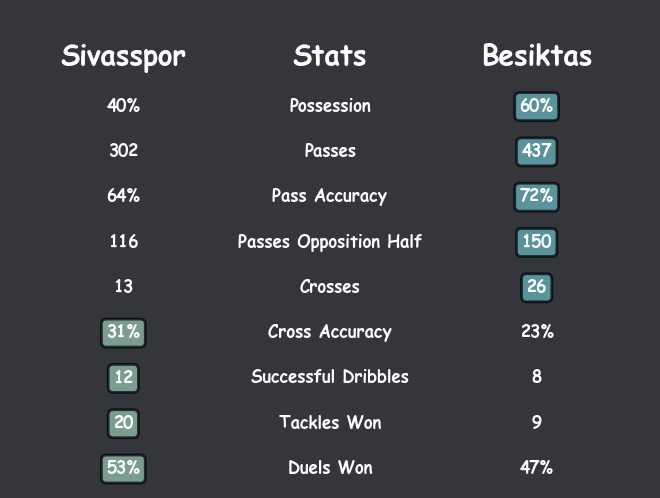

In [258]:
data = {
    'stats': ['Possession', 'Passes', 'Pass Accuracy', 'Passes Opposition Half', 'Crosses', 'Cross Accuracy',
             'Successful Dribbles', 'Tackles Won', 'Duels Won'],
    'stats_h': df.iloc[:,16:25].values.tolist()[0],
    'stats_a': df.iloc[:,34:].values.tolist()[0]
}

fig = plt.figure(figsize=(4,3), dpi=200)
ax = plt.subplot(111)

fig.patch.set_facecolor('#35363b')
ax.set_facecolor(color='#35363b')

ncols = 3
nrows = 10

ax.set_xlim(0, ncols)
ax.set_ylim(0, nrows)
ax.set_axis_off()


for i,j in zip(np.arange(0,9,1)[::-1],range(0,9)):
    
    ax.annotate(
            xy=(1.5,i),
            text=data['stats'][j],
            ha='center',
            color='white',
            size=6,
            weight='bold',
            family='Comic Sans MS'
            )  
    
    if ((data['stats_h'][j]>data['stats_a'][j]) and (data['stats'][j] in ['Possession','Pass Accuracy','Cross Accuracy','Duels Won'])):
        
            ax.annotate(
            xy=(0.5,i),
            text='{0:.0f}%'.format(data['stats_h'][j]*100).rstrip('0').rstrip('.'),size=6,
            ha='center',bbox=dict(boxstyle="round", alpha=0.7,facecolor='#9ac9b6'),
            color='white',
            weight='bold',
            family='Comic Sans MS'
            )
    
            ax.annotate(
            xy=(2.5,i),size=6,
            text='{0:.0f}%'.format(data['stats_a'][j]*100).rstrip('0').rstrip('.'),
            ha='center',color='white',
            weight='bold',
            family='Comic Sans MS'
            )
        
    elif (data['stats_h'][j]<data['stats_a'][j] and (data['stats'][j] in ['Possession','Pass Accuracy','Cross Accuracy','Duels Won'])):
        
            ax.annotate(
            xy=(0.5,i),
            text='{0:.0f}%'.format(data['stats_h'][j]*100).rstrip('0').rstrip('.'),size=6,
            ha='center',
            color='white',
            weight='bold',
            family='Comic Sans MS'
            )

            ax.annotate(
            xy=(2.5,i),
            text='{0:.0f}%'.format(data['stats_a'][j]*100).rstrip('0').rstrip('.'),size=6,
            ha='center',
            color='white',
            bbox=dict(boxstyle="round", alpha=0.7,facecolor='#7b3a52'),
            weight='bold',
            family='Comic Sans MS'
            )
        
        
    elif (data['stats_h'][j]==data['stats_a'][j] and (data['stats'][j] in ['Possession','Pass Accuracy','Cross Accuracy','Duels Won'])):
                
            ax.annotate(
            xy=(0.5,i),size=6,
            text='{0:.0f}%'.format(data['stats_h'][j]*100).rstrip('0').rstrip('.'),
            ha='center',
            color='white',
            weight='bold',
            family='Comic Sans MS'
            )

            ax.annotate(
            xy=(2.5,i),size=6,
            text='{0:.0f}%'.format(data['stats_a'][j]*100).rstrip('0').rstrip('.'),
            ha='center',
            color='white',
            weight='bold',
            family='Comic Sans MS'
            )
            
    elif (data['stats_h'][j]>data['stats_a'][j]) and (data['stats'][j] not in ['Possession','Pass Accuracy','Cross Accuracy','Duels Won']):
        
            ax.annotate(
            xy=(0.5,i),
            text='{0:.1f}'.format(data['stats_h'][j]).rstrip('0').rstrip('.'),size=6,
            ha='center',bbox=dict(boxstyle="round", alpha=0.7,facecolor='#9ac9b6'),
            color='white',
            weight='bold',
            family='Comic Sans MS'
            )
    
            ax.annotate(
            xy=(2.5,i),size=6,
            text='{0:.1f}'.format(data['stats_a'][j]).rstrip('0').rstrip('.'),
            ha='center',color='white',
            weight='bold',
            family='Comic Sans MS'
            )
        
    
    elif (data['stats_h'][j]<data['stats_a'][j] and (data['stats'][j] not in ['Possession','Pass Accuracy','Cross Accuracy','Duels Won'])):
        
            ax.annotate(
            xy=(0.5,i),
            text='{0:.1f}'.format(data['stats_h'][j]).rstrip('0').rstrip('.'),size=6,
            ha='center',
            color='white',
            weight='bold',
            family='Comic Sans MS'
            )

            ax.annotate(
            xy=(2.5,i),
            text='{0:.1f}'.format(data['stats_a'][j]).rstrip('0').rstrip('.'),size=6,
            ha='center',
            color='white',
            bbox=dict(boxstyle="round", alpha=0.7,facecolor='#6cbbc7'),
            weight='bold',
            family='Comic Sans MS'
            )
            
    else:    
            ax.annotate(
            xy=(0.5,i),size=6,
            text='{0:.1f}'.format(data['stats_h'][j]).rstrip('0').rstrip('.'),
            ha='center',
            color='white',
            weight='bold',
            family='Comic Sans MS'
            )

            ax.annotate(
            xy=(2.5,i),size=6,
            text='{0:.1f}'.format(data['stats_a'][j]).rstrip('0').rstrip('.'),
            ha='center',
            color='white',
            weight='bold',
            family='Comic Sans MS'
            )
      
     
        

ax.annotate(
    xy=(1.5, nrows-1),
    text='Stats',
    weight='bold',
    ha='center',
    family='Comic Sans MS',
    color='white'
)
ax.annotate(
    xy=(2.5, nrows-1),
    text=df['team_a'][0],
    weight='bold',
    ha='center',
    family='Comic Sans MS',
    color='white'
)

ax.annotate(
    xy=(0.5, nrows-1),
    text=df['team_h'][0],
    weight='bold',
    ha='center',
    family='Comic Sans MS',
    color='white'
)
 

plt.show()

In [285]:
df = pd.read_csv('stsl_matches.csv')
df = df[(df['team_h']=='Besiktas') | (df['team_a']=='Besiktas')]
df = df.tail(1)

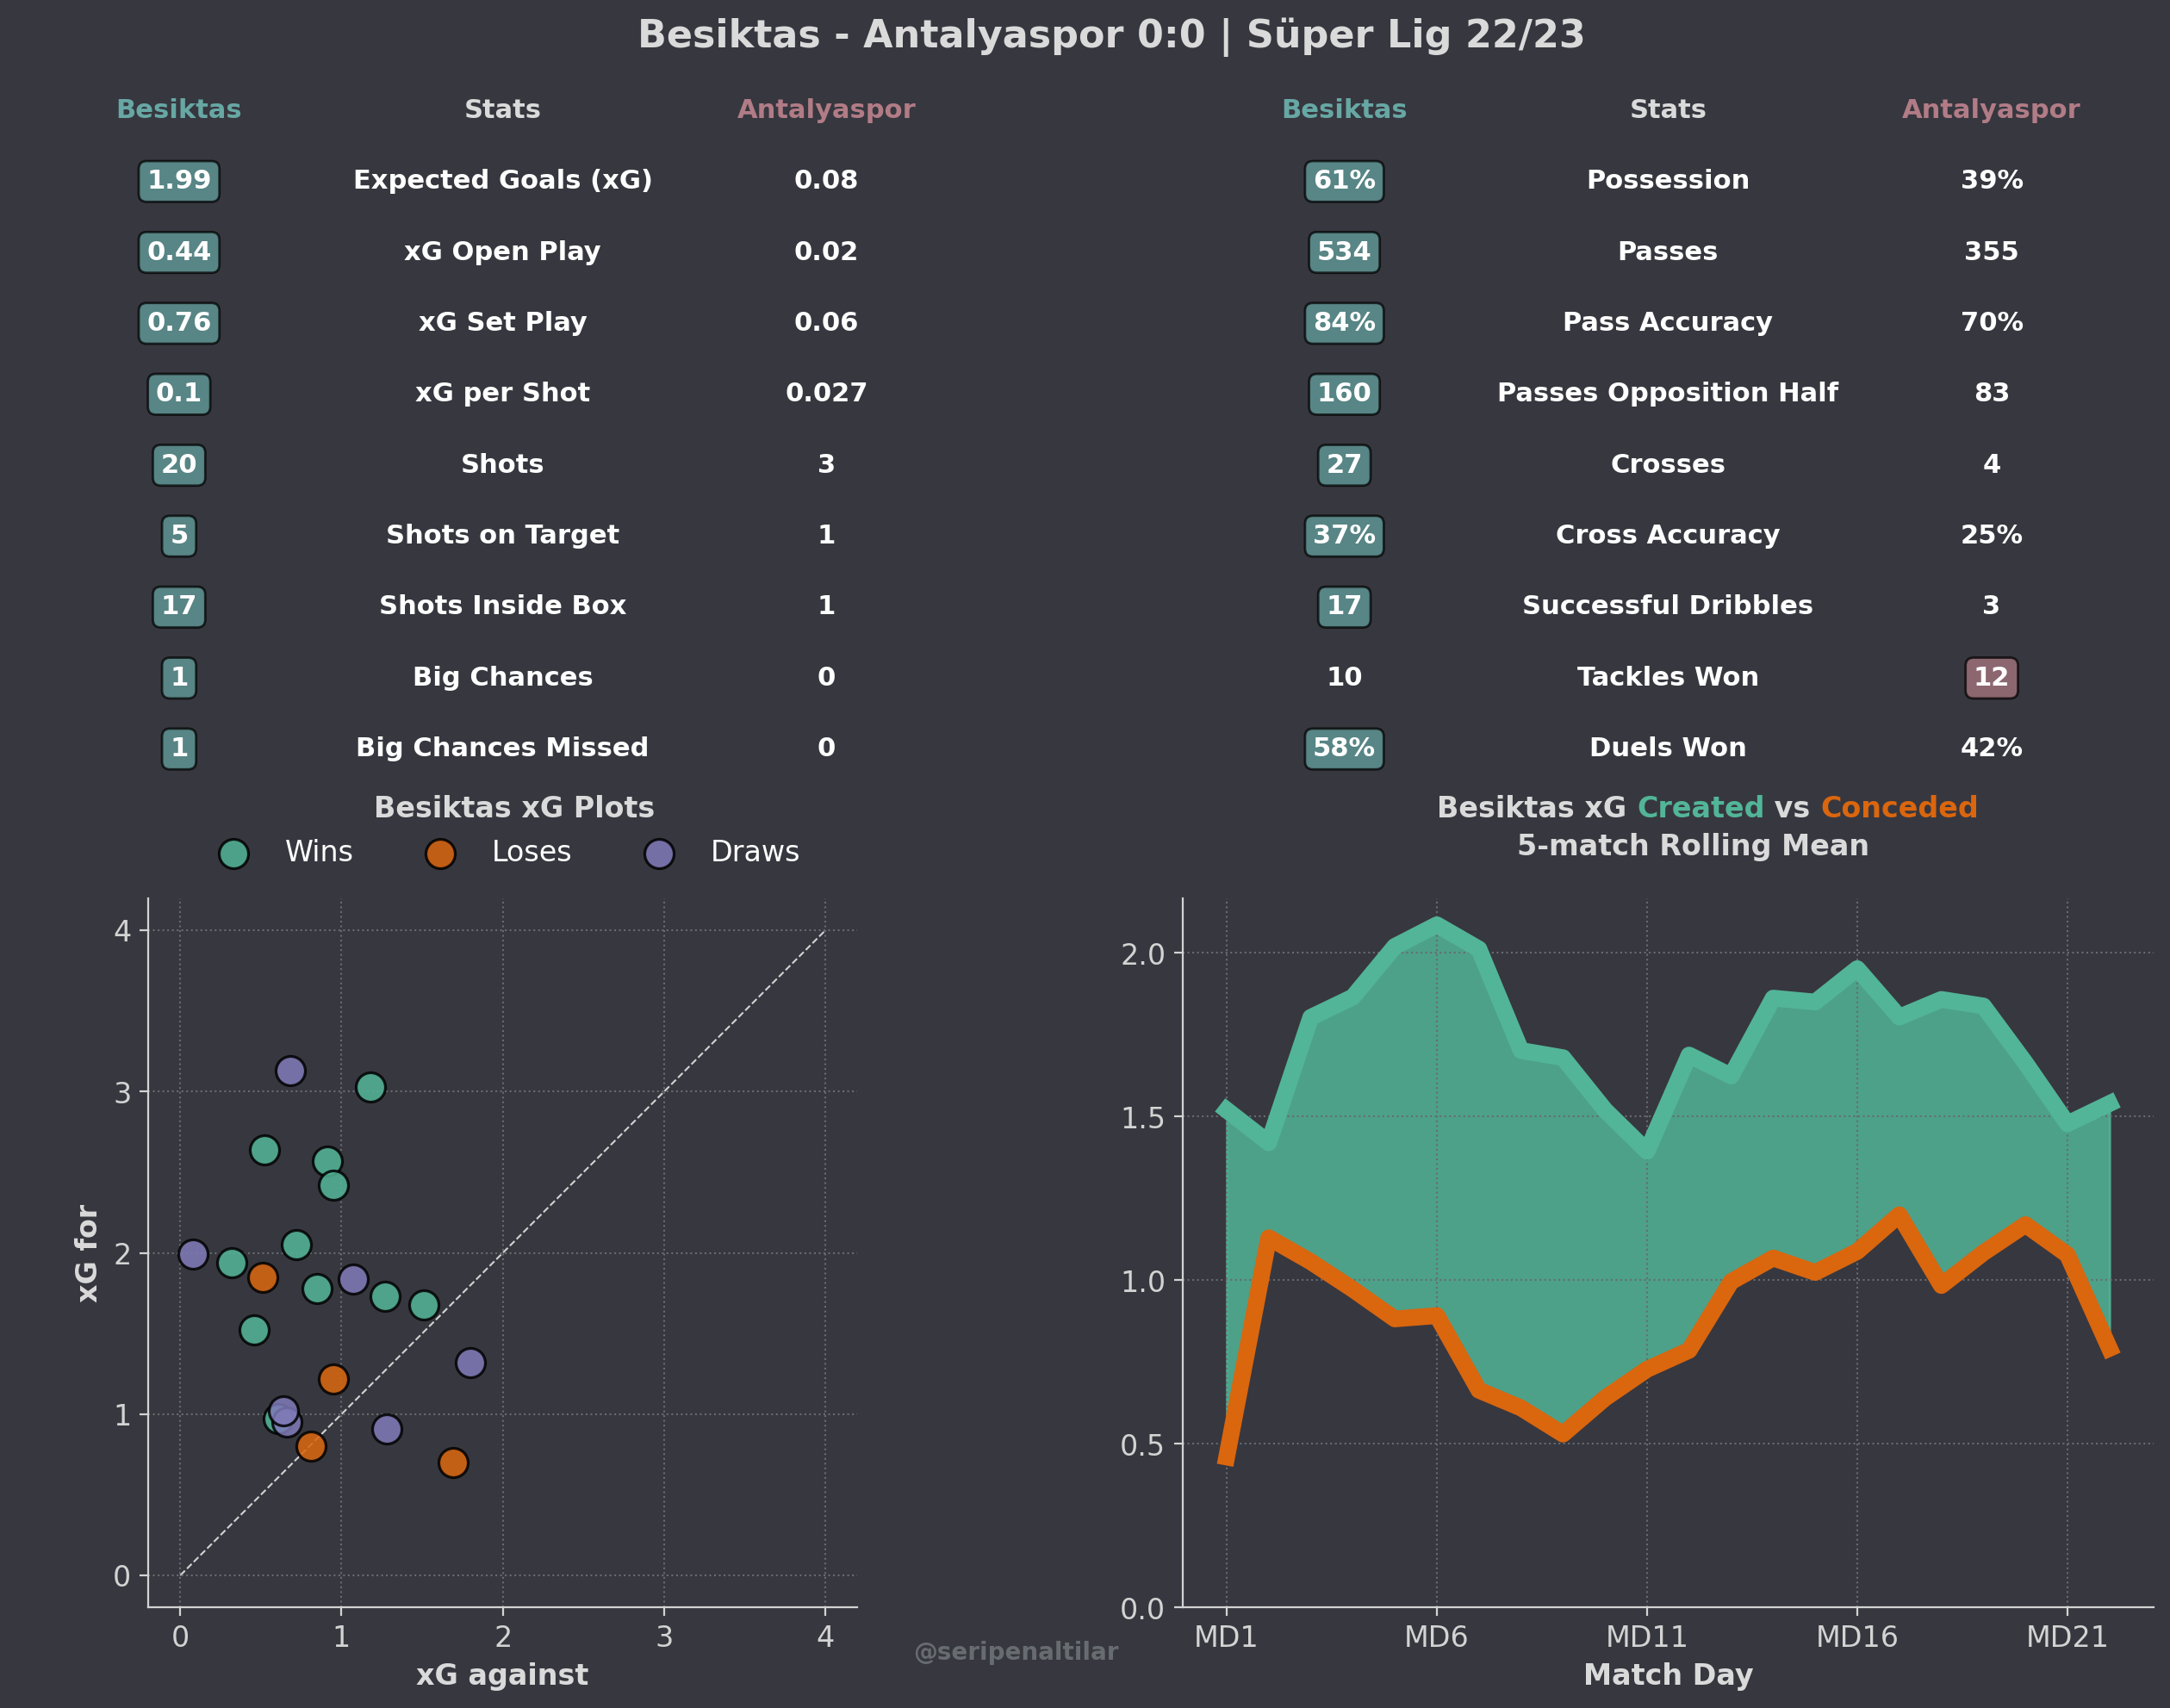

In [639]:
fig = plt.figure(figsize = (16,12), dpi = 200)
gspec = gridspec.GridSpec(
    ncols=2, nrows=2, figure=fig, 
)

fig.patch.set_facecolor('#37373f')

ax1 = plt.subplot(
    gspec[0,0]
)

data = {
    'stats': ['Expected Goals (xG)', 'xG Open Play', 'xG Set Play', 'xG per Shot', 'Shots', 'Shots on Target',
             'Shots Inside Box', 'Big Chances', 'Big Chances Missed'],
    'stats_h': df.iloc[:,7:16].values.tolist()[0],
    'stats_a': df.iloc[:,25:34].values.tolist()[0]
}

ax1.set_facecolor(color='#37373f')

ncols = 3
nrows = 10

ax1.set_xlim(0, ncols)
ax1.set_ylim(0, nrows)
ax1.set_axis_off()


for i,j in zip(np.arange(0,9,1)[::-1],range(0,9)):
    
    ax1.annotate(
            xy=(1.5,i),
            text=data['stats'][j],
            ha='center',
            color='white',
            size=11,
            weight='bold'
            )  
    
    if data['stats_h'][j]>data['stats_a'][j]:
        
            ax1.annotate(
            xy=(0.5,i),
            text='{0:.3f}'.format(data['stats_h'][j]).rstrip('0').rstrip('.'),size=11,
            ha='center',bbox=dict(boxstyle="round", alpha=0.7,facecolor='#67a7a4'),
            color='white',
            weight='bold'
            )
    
            ax1.annotate(
            xy=(2.5,i),size=11,
            text='{0:.3f}'.format(data['stats_a'][j]).rstrip('0').rstrip('.'),
            ha='center',color='white',
            weight='bold'
            )
        
    elif data['stats_h'][j]<data['stats_a'][j]:
        
            ax1.annotate(
            xy=(0.5,i),
            text='{0:.3f}'.format(data['stats_h'][j]).rstrip('0').rstrip('.'),size=11,
            ha='center',
            color='white',
            weight='bold'
            )

            ax1.annotate(
            xy=(2.5,i),
            text='{0:.3f}'.format(data['stats_a'][j]).rstrip('0').rstrip('.'),size=11,
            ha='center',
            color='white',
            bbox=dict(boxstyle="round", alpha=0.7,facecolor='#b17c86'),
            weight='bold',
            )
        
        
    else:                
            ax1.annotate(
            xy=(0.5,i),size=11,
            text='{0:.3f}'.format(data['stats_h'][j]).rstrip('0').rstrip('.'),
            ha='center',
            color='white',
            weight='bold'
            )

            ax1.annotate(
            xy=(2.5,i),size=11,
            text='{0:.3f}'.format(data['stats_a'][j]).rstrip('0').rstrip('.'),
            ha='center',
            color='white',
            weight='bold',
            )

ax1.annotate(
    xy=(1.5, nrows-1),
    text='Stats',
    weight='bold',
    ha='center',
    color='#dbdadb',
    size=11
)
ax1.annotate(
    xy=(2.5, nrows-1),
    text=df['team_a'].values.tolist()[0],
    weight='bold',
    ha='center',
    color='#b17c86',
    size=11
)

ax1.annotate(
    xy=(0.5, nrows-1),
    text=df['team_h'].values.tolist()[0],
    weight='bold',
    ha='center',
    color='#67a7a4',
    size=11
)
 

###ax2  
ax2 = plt.subplot(
    gspec[0,1]
)

data = {
    'stats': ['Possession', 'Passes', 'Pass Accuracy', 'Passes Opposition Half', 'Crosses', 'Cross Accuracy',
             'Successful Dribbles', 'Tackles Won', 'Duels Won'],
    'stats_h': df.iloc[:,16:25].values.tolist()[0],
    'stats_a': df.iloc[:,34:].values.tolist()[0]
}


ax2.set_facecolor(color='#37373f')


ncols = 3
nrows = 10

ax2.set_xlim(0, ncols)
ax2.set_ylim(0, nrows)
ax2.set_axis_off()


for i,j in zip(np.arange(0,9,1)[::-1],range(0,9)):
    
    ax2.annotate(
            xy=(1.5,i),
            text=data['stats'][j],
            ha='center',
            color='white',
            size=11,
            weight='bold',
            )  
    
    if ((data['stats_h'][j]>data['stats_a'][j]) and (data['stats'][j] in ['Possession','Pass Accuracy','Cross Accuracy','Duels Won'])):
        
            ax2.annotate(
            xy=(0.5,i),
            text='{0:.0f}%'.format(data['stats_h'][j]*100).rstrip('0').rstrip('.'),size=11,
            ha='center',bbox=dict(boxstyle="round", alpha=0.7,facecolor='#67a7a4'),
            color='white',
            weight='bold',
            )
    
            ax2.annotate(
            xy=(2.5,i),size=11,
            text='{0:.0f}%'.format(data['stats_a'][j]*100).rstrip('0').rstrip('.'),
            ha='center',color='white',
            weight='bold'
            )
        
    elif (data['stats_h'][j]<data['stats_a'][j] and (data['stats'][j] in ['Possession','Pass Accuracy','Cross Accuracy','Duels Won'])):
        
            ax2.annotate(
            xy=(0.5,i),
            text='{0:.0f}%'.format(data['stats_h'][j]*100).rstrip('0').rstrip('.'),size=11,
            ha='center',
            color='white',
            weight='bold'
            )

            ax2.annotate(
            xy=(2.5,i),
            text='{0:.0f}%'.format(data['stats_a'][j]*100).rstrip('0').rstrip('.'),size=11,
            ha='center',
            color='white',
            bbox=dict(boxstyle="round", alpha=0.7,facecolor='#b17c86'),
            weight='bold'
            )
        
        
    elif (data['stats_h'][j]==data['stats_a'][j] and (data['stats'][j] in ['Possession','Pass Accuracy','Cross Accuracy','Duels Won'])):
                
            ax2.annotate(
            xy=(0.5,i),size=11,
            text='{0:.0f}%'.format(data['stats_h'][j]*100).rstrip('0').rstrip('.'),
            ha='center',
            color='white',
            weight='bold'
            )

            ax2.annotate(
            xy=(2.5,i),size=11,
            text='{0:.0f}%'.format(data['stats_a'][j]*100).rstrip('0').rstrip('.'),
            ha='center',
            color='white',
            weight='bold',
            )
            
    elif (data['stats_h'][j]>data['stats_a'][j]) and (data['stats'][j] not in ['Possession','Pass Accuracy','Cross Accuracy','Duels Won']):
        
            ax2.annotate(
            xy=(0.5,i),
            text='{0:.1f}'.format(data['stats_h'][j]).rstrip('0').rstrip('.'),size=11,
            ha='center',bbox=dict(boxstyle="round", alpha=0.7,facecolor='#67a7a4'),
            color='white',
            weight='bold'
            )
    
            ax2.annotate(
            xy=(2.5,i),size=11,
            text='{0:.1f}'.format(data['stats_a'][j]).rstrip('0').rstrip('.'),
            ha='center',color='white',
            weight='bold'
            )
        
    
    elif (data['stats_h'][j]<data['stats_a'][j] and (data['stats'][j] not in ['Possession','Pass Accuracy','Cross Accuracy','Duels Won'])):
        
            ax2.annotate(
            xy=(0.5,i),
            text='{0:.1f}'.format(data['stats_h'][j]).rstrip('0').rstrip('.'),size=11,
            ha='center',
            color='white',
            weight='bold'
            )

            ax2.annotate(
            xy=(2.5,i),
            text='{0:.1f}'.format(data['stats_a'][j]).rstrip('0').rstrip('.'),size=11,
            ha='center',
            color='white',
            bbox=dict(boxstyle="round", alpha=0.7,facecolor='#b17c86'),
            weight='bold'
            )
            
    else:    
            ax2.annotate(
            xy=(0.5,i),size=11,
            text='{0:.1f}'.format(data['stats_h'][j]).rstrip('0').rstrip('.'),
            ha='center',
            color='white',
            weight='bold'
            )

            ax2.annotate(
            xy=(2.5,i),size=11,
            text='{0:.1f}'.format(data['stats_a'][j]).rstrip('0').rstrip('.'),
            ha='center',
            color='white',
            weight='bold'
            )
      
     
        

ax2.annotate(
    xy=(1.5, nrows-1),
    text='Stats',
    weight='bold',
    ha='center',
    color='#dbdadb',
    size=11
)
ax2.annotate(
    xy=(2.5, nrows-1),
    text=df['team_a'].values.tolist()[0],
    weight='bold',
    ha='center',
    color='#b17c86',
    size=11
)

ax2.annotate(
    xy=(0.5, nrows-1),
    text=df['team_h'].values.tolist()[0],
    weight='bold',
    ha='center',
    color='#67a7a4',
    size=11
)

#ax3 scatter plot xG for vs xG against
ax3 = plt.subplot(
    gspec[1,0]
)  

ax3.set_facecolor(color='#37373f')

# Axes aesthetics
ax3.spines["top"].set(visible = False)
ax3.spines["right"].set(visible = False)
ax3.spines[['left','bottom']].set_color('lightgrey')

#ax3.grid(lw = 0.9, color = "lightgrey", ls=':')
ax3.grid(
    visible = True, 
    lw = 0.75,
    ls = ":",
    color = "#676c70"
)

limit = math.ceil(max(x.max(), y.max()))

ax3.scatter(
      x,
      y,
      zorder = 2,
      s = 150,
      alpha = .15,
      color = "gray"
     )

ax3.scatter(
      x_win, 
      y_win, 
      zorder = 2, 
      s = 150, 
      fc = '#52b597', # The background color
      ec = "black", # The edge color
      alpha = 0.85, # Transparency (from zero to 1)
      lw = 1.15, #The line width of the marker.
      label = "Wins"
     )

ax3.scatter(
      x_lose, 
      y_lose, 
      zorder = 2, 
      s = 150, 
      fc = '#da660e', # The background color
      ec = "black", # The edge color
      alpha = 0.85, # Transparency (from zero to 1)
      lw = 1.15, #The line width of the marker.
      label = "Loses"
     )

ax3.scatter(
      x_draw, 
      y_draw, 
      zorder = 2, 
      s = 150, 
      fc = '#7f7ab8', # The background color
      ec = "black", # The edge color
      alpha = 0.85, # Transparency (from zero to 1)
      lw = 1.15, #The line width of the marker.
      label = "Draws"
     )

ax3.plot(
      [0,math.ceil(limit)],
      [0,math.ceil(limit)], 
      ls = "--", 
      marker = "None", 
      lw = 0.75, 
      color = "lightgray",
      zorder = 1
  )


ax3.legend(
      ncol = 3,
      loc = "upper center",
      bbox_to_anchor = [0.5, 1.12], # The axes coordinates (0 -> 1) on where the legend is placed.
      frameon = False,
      fontsize = 12,
      labelcolor='white'
   )


ax3.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax3.yaxis.set_major_locator(ticker.MultipleLocator(1))

# Notice the consistency in font size between the legend & ticks.
ax3.tick_params(labelsize = 12,colors='lightgrey')

# Add axes legends
ax3.yaxis.set_label_text("xG for", size = 12,color = '#dbdadb',weight='bold')
ax3.xaxis.set_label_text("xG against", size = 12,color = '#dbdadb',weight='bold')

ax3.set_aspect("equal")

title_ = ax3.text(
      x = 1.2, y = 4.7,
      s = 'Besiktas xG Plots',
      size = 12,
      color='#dbdadb',
      weight='bold'
  )


#ax4 scatter plot xG for vs xG against
ax4 = plt.subplot(
    gspec[1,1]
)

y_for = scatter['xg_for']
y_ag = scatter['xg_against']
x_all = scatter['week']

y_for = y_for.rolling(window = 5, min_periods = 0).mean()
y_ag = y_ag.rolling(window = 5, min_periods = 0).mean()

ax4.set_facecolor(color='#37373f')

line1 = ax4.plot(x_all, y_for, label = "xG created", zorder=4, color='#52b597', linewidth=7)
line2 = ax4.plot(x_all, y_ag, label = "xG conceded", zorder=4, color='#da660e', linewidth=7)

# Fill between
ax4.fill_between(
    x_all, 
    y_ag,
    y_for, 
    where = y_for > y_ag, 
    interpolate = True,
    alpha = 0.85,
    color = line1[0].get_color()
)

ax4.fill_between(
    x_all, 
    y_ag,
    y_for, 
    where = y_ag >= y_for, 
    interpolate = True,
    alpha = 0.85,
    color = line2[0].get_color()
)

# Axes aesthetics
ax4.spines["top"].set(visible = False)
ax4.spines["right"].set(visible = False)
ax4.spines[['left','bottom']].set_color('lightgrey')

# Set the grid
ax4.grid(
    visible = True, 
    lw = 0.75,
    ls = ":",
    color = "#676c70"
)


ax4.tick_params(labelsize = 12,colors='lightgrey')

# Set x-axis major tick positions to only 19 game multiples.
ax4.xaxis.set_major_locator(ticker.MultipleLocator(5))
# Set y-axis major tick positions to only 0.5 xG multiples.
ax4.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax4.set_ylim(0)
ax4.xaxis.set_label_text('Match Day', size = 12,color = '#dbdadb',weight='bold')

fig_text(
    x =0.64, y = 0.518,
    s = "Besiktas xG <Created> vs <Conceded>\n        5-match Rolling Mean",
    highlight_textprops = [
        {"color": line1[0].get_color(), "weight": "bold"},
        {"color": line2[0].get_color(), "weight": "bold"}
    ],
    color = "#dbdadb",
    size = 12,
    annotationbbox_kw={"xycoords": "figure fraction"},
    weight='bold'
)


plt.figtext(0.35,0.88,df['team_h'].values.tolist()[0]+" - "+df['team_a'].values.tolist()[0]+" "+
            str(df['goal_h'].values.tolist()[0])+":"+str(df['goal_a'].values.tolist()[0])+" | Süper Lig 22/23",
            fontweight='bold',fontsize=16,color='#dbdadb')

plt.figtext(0.45,0.10,"@seripenaltilar",
            fontweight='bold',fontsize=10,color='#676c70')
plt.show()

In [372]:
df = pd.read_csv('stsl_matches.csv')
df['date'] = pd.to_datetime(df['date'])
df = df[['team_h','team_a','date','week','xg_h','xg_a','result']]
df_h = df[df['team_h']=='Besiktas'].rename(columns={'xg_h':'xg_for','xg_a':'xg_against'})
df_a = df[df['team_a']=='Besiktas'].rename(columns={'xg_a':'xg_for','xg_h':'xg_against'})
df_a = df_a[['team_h','team_a','date','week','xg_for','xg_against','result']]
data = pd.concat([df_h,df_a])
data.sort_values(by='date',inplace=True)

x = data['xg_against']
y = data['xg_for']

x_win = data[data['result']=='Besiktas']['xg_against']
y_win = data[data['result']=='Besiktas']['xg_for']

x_lose = data[(data['result']!='Besiktas') & (data['result']!='Draw')]['xg_against']
y_lose = data[(data['result']!='Besiktas') & (data['result']!='Draw')]['xg_for']

x_draw = data[data['result']=='Draw']['xg_against']
y_draw = data[data['result']=='Draw']['xg_for']

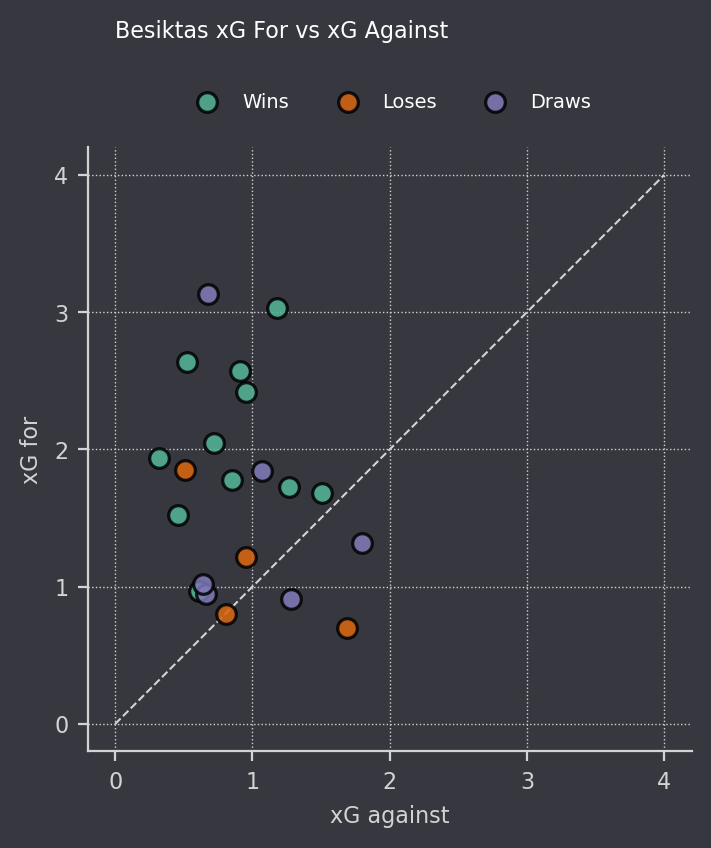

In [487]:
fig = plt.figure(figsize=(6,4), dpi=200)
ax = plt.subplot(111)

fig.patch.set_facecolor('#37373f')
ax.set_facecolor(color='#37373f')

# Axes aesthetics
ax.spines["top"].set(visible = False)
ax.spines["right"].set(visible = False)
ax.spines[['left','bottom']].set_color('lightgrey')

ax.grid(lw = 0.5, color = "lightgrey", ls=":")

limit = math.ceil(max(x.max(), y.max()))


ax.scatter(
      x,
      y,
      zorder = 2,
      s = 50,
      alpha = .15,
      color = "gray"
     )

ax.scatter(
      x_win, 
      y_win, 
      zorder = 2, 
      s = 50, 
      fc = '#52b597', # The background color
      ec = "black", # The edge color
      alpha = 0.85, # Transparency (from zero to 1)
      lw = 1.15, #The line width of the marker.
      label = "Wins"
     )

ax.scatter(
      x_lose, 
      y_lose, 
      zorder = 2, 
      s = 50, 
      fc = '#da660e', # The background color
      ec = "black", # The edge color
      alpha = 0.85, # Transparency (from zero to 1)
      lw = 1.15, #The line width of the marker.
      label = "Loses"
     )

ax.scatter(
      x_draw, 
      y_draw, 
      zorder = 2, 
      s = 50, 
      fc = '#7f7ab8', # The background color
      ec = "black", # The edge color
      alpha = 0.85, # Transparency (from zero to 1)
      lw = 1.15, #The line width of the marker.
      label = "Draws"
     )

ax.plot(
      [0,math.ceil(limit)],
      [0,math.ceil(limit)], 
      ls = "--", 
      marker = "None", 
      lw = 0.75, 
      color = "lightgray",
      zorder = 1
  )


ax.legend(
      ncol = 3,
      loc = "upper center",
      bbox_to_anchor = [0.5, 1.12], # The axes coordinates (0 -> 1) on where the legend is placed.
      frameon = False,
      fontsize = 7,
      labelcolor='white'
   )


ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# Notice the consistency in font size between the legend & ticks.
ax.tick_params(labelsize = 8,colors='lightgrey')

# Add axes legends
ax.yaxis.set_label_text("xG for", size = 8,color = 'lightgrey')
ax.xaxis.set_label_text("xG against", size = 8,color = 'lightgrey')

ax.set_aspect("equal")

title_ = ax.text(
      x = 0, y = 5.0,
      s = 'Besiktas xG For vs xG Against',
      size = 8,
      color='white'
  )

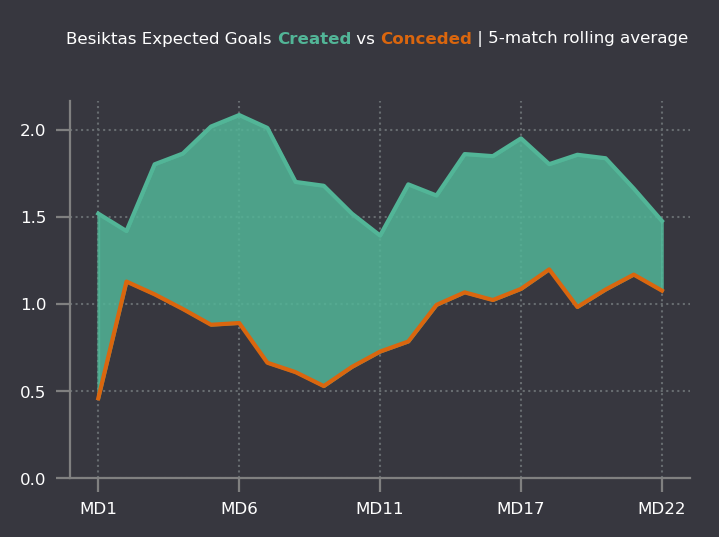

In [492]:
y_for = scatter['xg_for']
y_ag = scatter['xg_against']
#x_all = pd.Series(range(len(y_for)))
x_all = scatter['week']

y_for = y_for.rolling(window = 5, min_periods = 0).mean()
y_ag = y_ag.rolling(window = 5, min_periods = 0).mean()

fig = plt.figure(figsize=(4, 2.5), dpi = 200)
ax = plt.subplot(111)

fig.patch.set_facecolor('#37373f')
ax.set_facecolor(color='#37373f')

line1 = ax.plot(x_all, y_for, label = "xG created", zorder=4, color='#52b597')
line2 = ax.plot(x_all, y_ag, label = "xG conceded", zorder=4, color='#da660e')

# Fill between
ax.fill_between(
    x_all, 
    y_ag,
    y_for, 
    where = y_for > y_ag, 
    interpolate = True,
    alpha = 0.85,
    zorder = 3,
    color = line1[0].get_color()
)

ax.fill_between(
    x_all, 
    y_ag,
    y_for, 
    where = y_ag >= y_for, 
    interpolate = True,
    alpha = 0.85,
    color = line2[0].get_color()
)

# Remove top & right spines and change the color.
ax.spines[["top", "right"]].set_visible(False)
ax.spines[["left", "bottom"]].set_color("gray")

# Set the grid
ax.grid(
    visible = True, 
    lw = 0.75,
    ls = ":",
    color = "#676c70"
)

ax.tick_params(
    color = "grey", 
    length = 5, 
    which = "major", 
    labelsize = 6,
    labelcolor = "white"
)

# Set x-axis major tick positions to only 19 game multiples.
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
# Set y-axis major tick positions to only 0.5 xG multiples.
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.set_ylim(0)


fig_text(
    x = 0.12, y = 1.02,
    s = "Besiktas Expected Goals <Created> vs <Conceded> | 5-match rolling average",
    highlight_textprops = [
        {"color": line1[0].get_color(), "weight": "bold"},
        {"color": line2[0].get_color(), "weight": "bold"}
    ],
    color = "white",
    size = 6,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

plt.show()